## Business problem overview


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Importing Libraries

In [1]:
# Importing the requrired libraries

import numpy as np, pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Setting the number of rows to be displayed while priting the dataframe.
# None means that pandas will display all the rows in a dataframe when printed.

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Reading the dataset

In [3]:
# Reading the data

df = pd.read_csv('D:/telecom_churn_data.csv')

In [4]:
df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [5]:
# Shape of the dataset

df.shape

(99999, 226)

In [6]:
# Various summary statistics 

df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# Transposing for better readability.

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


In [8]:
# Structure of the Dataframe and getting an overview of the data types of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [9]:
# 'verbose' parameter controls the amount of information displayed.
# When verbose is set to 'True', additional details about the dataframe are displayed.

df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

Null Values

In [10]:
# Count of the missing values in the data in descending order.

df.isnull().sum().sort_values(ascending= False)

arpu_3g_6                   74846
night_pck_user_6            74846
total_rech_data_6           74846
arpu_2g_6                   74846
max_rech_data_6             74846
fb_user_6                   74846
av_rech_amt_data_6          74846
date_of_last_rech_data_6    74846
count_rech_2g_6             74846
count_rech_3g_6             74846
date_of_last_rech_data_7    74428
total_rech_data_7           74428
fb_user_7                   74428
max_rech_data_7             74428
night_pck_user_7            74428
count_rech_2g_7             74428
av_rech_amt_data_7          74428
arpu_2g_7                   74428
count_rech_3g_7             74428
arpu_3g_7                   74428
total_rech_data_9           74077
count_rech_3g_9             74077
fb_user_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
date_of_last_rech_data_9    74077
night_pck_user_9            74077
arpu_2g_9                   74077
count_rech_2g_9             74077
av_rech_amt_da

In [11]:
# Percentage of the missing values in the data in descending order.

round((df.isnull().sum()/df.shape[0])*100, 2).sort_values(ascending= False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [12]:
# Imputing the Null Values in the data based on Months.
# Month 6

columns_for_month_6 = [
    'arpu_2g_6', 'night_pck_user_6', 'count_rech_3g_6',
    'av_rech_amt_data_6', 'count_rech_2g_6', 'max_rech_data_6',
    'fb_user_6', 'date_of_last_rech_data_6', 'total_rech_data_6', 'arpu_3g_6'
]

The null values in the above columns are due to customers not recharging at a certain time and the data being null as a result.

In [13]:
# List comprehension to check equality of missing values between 'total_rech_data_6' and specified columns for the month of June
# For each column, the result is 'True' if the missing values are equal and 'False' otherwise.

null_equality_results = [df['total_rech_data_6'].isnull().equals(df[col].isnull()) for col in columns_for_month_6]

# Print the results
for result in null_equality_results:
    print(result)

True
True
True
True
True
True
True
True
True
True


In [14]:
# Define a dictionary with replacement values for each column in month_6
replacement_values = {col: 0 for col in columns_for_month_6}

# Fill null values using the dictionary
df[columns_for_month_6] = df[columns_for_month_6].fillna(replacement_values)

In [15]:
# Month 7
columns_for_month_7 = ['arpu_2g_7', 'night_pck_user_7', 'count_rech_3g_7',
       'av_rech_amt_data_7', 'count_rech_2g_7', 'max_rech_data_7', 'fb_user_7',
       'date_of_last_rech_data_7', 'total_rech_data_7', 'arpu_3g_7']

In [16]:
null_equality_results = [df['total_rech_data_7'].isnull().equals(df[col].isnull()) for col in columns_for_month_7]

# Print the results
for result in null_equality_results:
    print(result)

True
True
True
True
True
True
True
True
True
True


In [17]:
# Define a dictionary with replacement values for each column in month_7
replacement_values = {col: 0 for col in columns_for_month_7}

# Fill null values using the dictionary
df[columns_for_month_7] = df[columns_for_month_7].fillna(replacement_values)

In [18]:
# Month 8

columns_for_month_8 = ['arpu_2g_8', 'night_pck_user_8', 'count_rech_3g_8',
       'av_rech_amt_data_8', 'count_rech_2g_8', 'max_rech_data_8', 'fb_user_8',
       'date_of_last_rech_data_8', 'total_rech_data_8', 'arpu_3g_8']

In [19]:
null_equality_results = [df['total_rech_data_8'].isnull().equals(df[col].isnull()) for col in columns_for_month_8]

# Print the results
for result in null_equality_results:
    print(result)

True
True
True
True
True
True
True
True
True
True


In [20]:
# Define a dictionary with replacement values for each column in month_8
replacement_values = {col: 0 for col in columns_for_month_8}

# Fill null values using the dictionary
df[columns_for_month_8] = df[columns_for_month_8].fillna(replacement_values)

In [21]:
# Month 9

columns_for_month_9 = ['arpu_2g_9', 'night_pck_user_9', 'count_rech_3g_9',
       'av_rech_amt_data_9', 'count_rech_2g_9', 'max_rech_data_9', 'fb_user_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'arpu_3g_9']

In [22]:
null_equality_results = [df['total_rech_data_9'].isnull().equals(df[col].isnull()) for col in columns_for_month_9]

# Print the results
for result in null_equality_results:
    print(result)

True
True
True
True
True
True
True
True
True
True


In [23]:
# Define a dictionary with replacement values for each column in month_9
replacement_values = {col: 0 for col in columns_for_month_9}

# Fill null values using the dictionary
df[columns_for_month_9] = df[columns_for_month_9].fillna(replacement_values)

In [24]:
round((df.isnull().sum()/df.shape[0])*100, 2).sort_values(ascending= False)

loc_og_t2m_mou_9            7.75
loc_ic_t2m_mou_9            7.75
std_og_t2m_mou_9            7.75
std_ic_t2f_mou_9            7.75
roam_ic_mou_9               7.75
std_og_t2t_mou_9            7.75
std_ic_t2m_mou_9            7.75
roam_og_mou_9               7.75
loc_og_mou_9                7.75
std_ic_t2o_mou_9            7.75
loc_og_t2t_mou_9            7.75
std_ic_t2t_mou_9            7.75
loc_ic_t2f_mou_9            7.75
isd_og_mou_9                7.75
loc_og_t2c_mou_9            7.75
loc_ic_mou_9                7.75
loc_ic_t2t_mou_9            7.75
offnet_mou_9                7.75
onnet_mou_9                 7.75
std_ic_mou_9                7.75
ic_others_9                 7.75
std_og_mou_9                7.75
isd_ic_mou_9                7.75
spl_og_mou_9                7.75
std_og_t2c_mou_9            7.75
spl_ic_mou_9                7.75
og_others_9                 7.75
std_og_t2f_mou_9            7.75
loc_og_t2f_mou_9            7.75
og_others_8                 5.38
std_og_t2t

Imputing the remaining null values found in the columns

In [25]:
# Define a function named nan_to_zero that takes a parameter x

def nan_to_zero(x):
    # Check if the string representation of x is 'nan'
    if str(x)=='nan':
        # If x is 'nan', return 0
        return 0
    else:
        # If x is not 'nan', return x unchanged
        return x

In [26]:
# Get columns with '_9' at the end and contain 'nan' values
columns_with_9_and_nan = [col for col in df.columns if col.endswith('_9') and df[col].isnull().any()]

# Exclude columns that do not contain any null values
filtered_columns = [col for col in columns_with_9_and_nan if df[col].notnull().any()]

In [27]:
# Define a function named fill_nan_with_zero_in_selected_columns that takes a DataFrame df as a parameter
def fill_nan_with_zero_in_selected_columns(df):
    # Get columns ending with '_9' that contain null values
    columns_with_nulls_9 = [col for col in df.columns if col.endswith('_9') and df[col].isnull().any()]

    # Exclude columns ending with '_9' that do not contain any null values
    filtered_columns = [col for col in columns_with_nulls_9 if df[col].notnull().any()]

    # Fill NaN values with zero in the selected columns directly in the main DataFrame
    df[filtered_columns] = df[filtered_columns].fillna(0)

# Use the function to fill NaN values with zero directly in the main DataFrame
fill_nan_with_zero_in_selected_columns(df)

In [28]:
# Get columns with '_8' at the end and contain 'nan' values
columns_with_8_and_nan = [col for col in df.columns if col.endswith('_8') and df[col].isnull().any()]

# Exclude columns that do not contain any null values
filtered_columns = [col for col in columns_with_8_and_nan if df[col].notnull().any()]

In [29]:
# Define a function named fill_nan_with_zero_in_selected_columns that takes a DataFrame df as a parameter
def fill_nan_with_zero_in_selected_columns(df):
    # Get columns ending with '_8' that contain null values
    columns_with_nulls_8 = [col for col in df.columns if col.endswith('_8') and df[col].isnull().any()]

    # Exclude columns ending with '_8' that do not contain any null values
    filtered_columns = [col for col in columns_with_nulls_8 if df[col].notnull().any()]

    # Fill NaN values with zero in the selected columns directly in the main DataFrame
    df[filtered_columns] = df[filtered_columns].fillna(0)

# Use the function to fill NaN values with zero directly in the main DataFrame
fill_nan_with_zero_in_selected_columns(df)

In [30]:
# Get columns with '_7' at the end and contain 'nan' values
columns_with_8_and_nan = [col for col in df.columns if col.endswith('_7') and df[col].isnull().any()]

# Exclude columns that do not contain any null values
filtered_columns = [col for col in columns_with_8_and_nan if df[col].notnull().any()]

In [31]:
# Define a function named fill_nan_with_zero_in_selected_columns that takes a DataFrame df as a parameter
def fill_nan_with_zero_in_selected_columns(df):
    # Get columns ending with '_7' that contain null values
    columns_with_nulls_7 = [col for col in df.columns if col.endswith('_7') and df[col].isnull().any()]

    # Exclude columns ending with '_7' that do not contain any null values
    filtered_columns = [col for col in columns_with_nulls_7 if df[col].notnull().any()]

    # Fill NaN values with zero in the selected columns directly in the main DataFrame
    df[filtered_columns] = df[filtered_columns].fillna(0)

# Use the function to fill NaN values with zero directly in the main DataFrame
fill_nan_with_zero_in_selected_columns(df)

In [32]:
# Get columns with '_6' at the end and contain 'nan' values
columns_with_8_and_nan = [col for col in df.columns if col.endswith('_6') and df[col].isnull().any()]

# Exclude columns that do not contain any null values
filtered_columns = [col for col in columns_with_8_and_nan if df[col].notnull().any()]

In [33]:
# Define a function named fill_nan_with_zero_in_selected_columns that takes a DataFrame df as a parameter
def fill_nan_with_zero_in_selected_columns(df):
    # Get columns ending with '_6' that contain null values
    columns_with_nulls_6 = [col for col in df.columns if col.endswith('_6') and df[col].isnull().any()]

    # Exclude columns ending with '_6' that do not contain any null values
    filtered_columns = [col for col in columns_with_nulls_6 if df[col].notnull().any()]

    # Fill NaN values with zero in the selected columns directly in the main DataFrame
    df[filtered_columns] = df[filtered_columns].fillna(0)

# Use the function to fill NaN values with zero directly in the main DataFrame
fill_nan_with_zero_in_selected_columns(df)

In [34]:
round((df.isnull().sum()/df.shape[0])*100, 2).sort_values(ascending= False)

loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
mobile_number               0.00
last_day_rch_amt_9          0.00
max_rech_amt_6              0.00
max_rech_amt_7              0.00
max_rech_amt_8              0.00
max_rech_amt_9              0.00
date_of_last_rech_6         0.00
date_of_last_rech_7         0.00
date_of_last_rech_8         0.00
date_of_last_rech_9         0.00
last_day_rch_amt_6          0.00
last_day_rch_amt_7          0.00
last_day_rch_amt_8          0.00
date_of_last_rech_data_7    0.00
date_of_last_rech_data_6    0.00
total_rech_amt_8            0.00
date_of_last_rech_data_8    0.00
date_of_last_rech_data_9    0.00
total_rech_data_6           0.00
total_rech_data_7           0.00
total_rech_data_8           0.00
total_rech_data_9           0.00
max_rech_data_6             0.00
max_rech_data_7             0.00
max_rech_data_8             0.00
max_rech_data_9             0.00
total_rech_amt_9            0.00
total_rech

In [35]:
# List comprehension to identify columns with only one unique value

unique_values = [col for col in df.columns if df[col].nunique() == 1]
print(unique_values)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [36]:
df.drop(columns=unique_values, inplace=True)

In [37]:
round((df.isnull().sum()/df.shape[0])*100, 2).sort_values(ascending= False)

mobile_number               0.0
max_rech_amt_8              0.0
date_of_last_rech_6         0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
date_of_last_rech_9         0.0
last_day_rch_amt_6          0.0
last_day_rch_amt_7          0.0
last_day_rch_amt_8          0.0
last_day_rch_amt_9          0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_8    0.0
date_of_last_rech_data_9    0.0
total_rech_data_6           0.0
total_rech_data_7           0.0
total_rech_data_8           0.0
total_rech_data_9           0.0
max_rech_data_6             0.0
max_rech_data_7             0.0
max_rech_data_8             0.0
max_rech_data_9             0.0
count_rech_2g_6             0.0
count_rech_2g_7             0.0
count_rech_2g_8             0.0
max_rech_amt_9              0.0
max_rech_amt_7              0.0
std_ic_mou_9                0.0
max_rech_amt_6              0.0
total_ic_mou_7              0.0
total_ic_mou_8              0.0
total_ic

In [38]:
# Identify columns related to recharge amount or recharge data using regular expression

amt_recharge_columns =  df.columns[df.columns.str.contains('rech_amt|rech_data')]
print(amt_recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


Filtering the high value customer from good phase

In [39]:
# Create a new column 'total_rech_amt_data_6' by multiplying 'av_rech_amt_data_6' with 'total_rech_data_6'
df['total_rech_amt_data_6'] = df.av_rech_amt_data_6 * df.total_rech_data_6

# Create a new column 'total_rech_amt_data_7' by multiplying 'av_rech_amt_data_7' with 'total_rech_data_7'
df['total_rech_amt_data_7'] = df.av_rech_amt_data_7 * df.total_rech_data_7

# Create a new column 'total_rech_amt_data_8' by multiplying 'av_rech_amt_data_8' with 'total_rech_data_8'
df['total_rech_amt_data_8'] = df.av_rech_amt_data_8 * df.total_rech_data_8

In [40]:
# Calculate the total average recharge amount for the good phase
df['total_avg_rech_amt_good_phase'] = (df.total_rech_amt_6 + df.total_rech_amt_data_6 +
                                        df.total_rech_amt_7 + df.total_rech_amt_data_7) / 2

# Calculate the 70th percentile of the total average recharge amount
df_hvc = df['total_avg_rech_amt_good_phase'].quantile(0.70)

# Print the 70th percentile value
print(df_hvc)

# Filter high-value customers using the 70th percentile threshold
df = df[df['total_avg_rech_amt_good_phase'] >= df_hvc]

478.0


In [41]:
df.shape

(30001, 217)

Defining the Churn variable

In [42]:
# Specify a list of columns related to churn for analysis
churn_columns=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']


df[churn_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [43]:
# Add a new 'churn' column based on the sum of churn-related columns

df['churn'] = df.apply(lambda row: 1 if row[churn_columns].sum() == 0 else 0, axis=1)

In [44]:
# Print the percentage distribution of 'churn' values in the DataFrame

print((df['churn'].value_counts() / len(df)) * 100)

0    91.863605
1     8.136395
Name: churn, dtype: float64


In [45]:
# Identify and print columns related to the churn phase (ending with '_9')
churn_phase_cols = [col for col in df.columns if '_9' in col]

print(churn_phase_cols)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [46]:
# Drop columns related to the churn phase (ending with '_9') from the DataFrame

df.drop(churn_phase_cols, axis=1, inplace=True)

In [47]:
# Get column names sorted by data type
columns_sorted_by_dtype = df.dtypes.sort_values().index

# Display the DataFrame info with columns sorted by data type
df[columns_sorted_by_dtype].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 166 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    mobile_number                  int64  
 1    total_rech_num_8               int64  
 2    total_rech_amt_6               int64  
 3    total_rech_amt_7               int64  
 4    total_rech_amt_8               int64  
 5    max_rech_amt_6                 int64  
 6    max_rech_amt_7                 int64  
 7    max_rech_amt_8                 int64  
 8    last_day_rch_amt_6             int64  
 9    last_day_rch_amt_7             int64  
 10   last_day_rch_amt_8             int64  
 11   monthly_2g_6                   int64  
 12   monthly_2g_7                   int64  
 13   monthly_2g_8                   int64  
 14   sachet_2g_6                    int64  
 15   sachet_2g_7                    int64  
 16   sachet_2g_8                    int64  
 17   monthly_3g_6                 

In [48]:
# Dropping the columns that contain dates as they do not hold significant value for the data.

df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'last_date_of_month_8', 'date_of_last_rech_8',
            'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'last_date_of_month_7',
            'date_of_last_rech_data_6'], axis = 1, inplace= True)

Exploratory Data Analysis


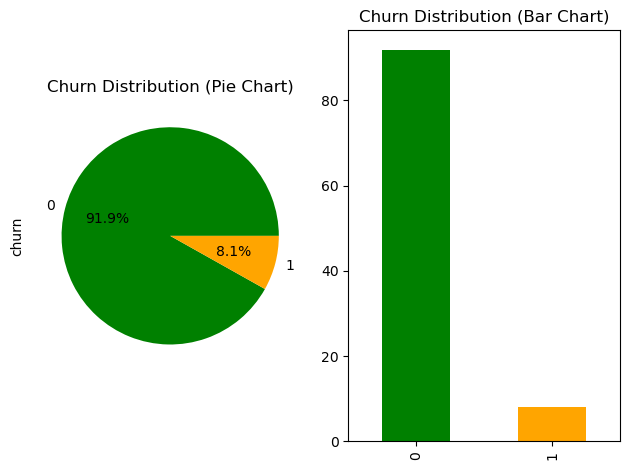

In [49]:
churn_distribution = df['churn'].value_counts() / len(df) * 100

# Plot a pie chart for churn distribution
plt.subplot(1, 2, 1)

churn_distribution.plot(kind="pie", colors =['green', 'orange'],autopct='%1.1f%%')
plt.title('Churn Distribution (Pie Chart)')

# Plot a bar chart for churn distribution
plt.subplot(1, 2, 2)
churn_distribution.plot(kind="bar", color=['green', 'orange'])
plt.title('Churn Distribution (Bar Chart)')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

In [50]:
# Define a function named plot_num_columns that takes a list of numerical column names and an optional scale parameter
def plot_num_columns(column_names, scale='linear'):
    # Get the number of numerical variables
    num_variables = len(column_names)

    # Create subplots dynamically based on the number of numerical variables
    fig, axes = plt.subplots(1, num_variables, figsize=(16, 8))

    # Iterate over numerical variables
    for i, col in enumerate(column_names):
        ax = axes[i] if num_variables > 1 else axes  # Handle the case when only one numerical variable is present
        sns.boxplot(x='churn', y=col, data=df, ax=ax, palette={1: 'orange', 0: 'green'})
        
        # Set plot title
        title = f'{col} vs Churn'
        ax.set(title=title)
        
        # Set y-axis scale if specified as 'log'
        if scale == 'log':
            ax.set_yscale('log')
            ax.set(ylabel=f'{col} (Log Scale)')

    
    plt.show()

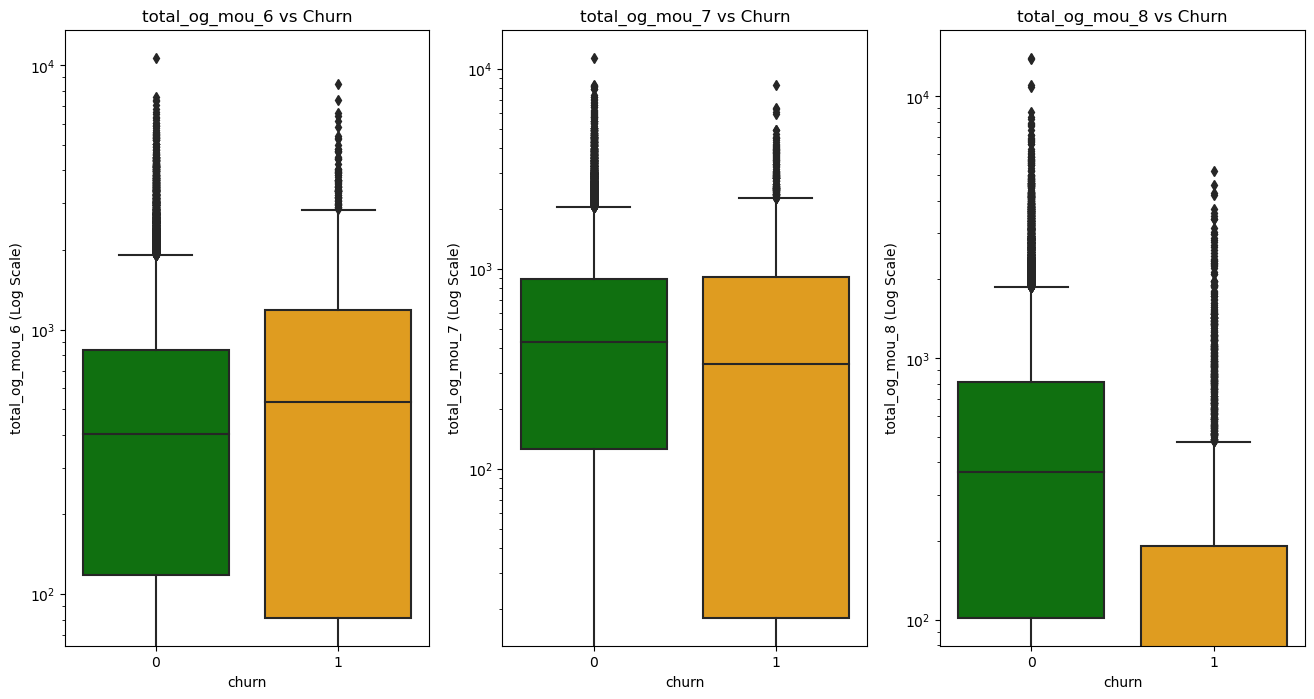

In [51]:
columns = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_num_columns(columns,'log')

- Customers who spend less in the month 7 are more likely to churn.
- Customers who spend more in the month 6 are more likely to churn.

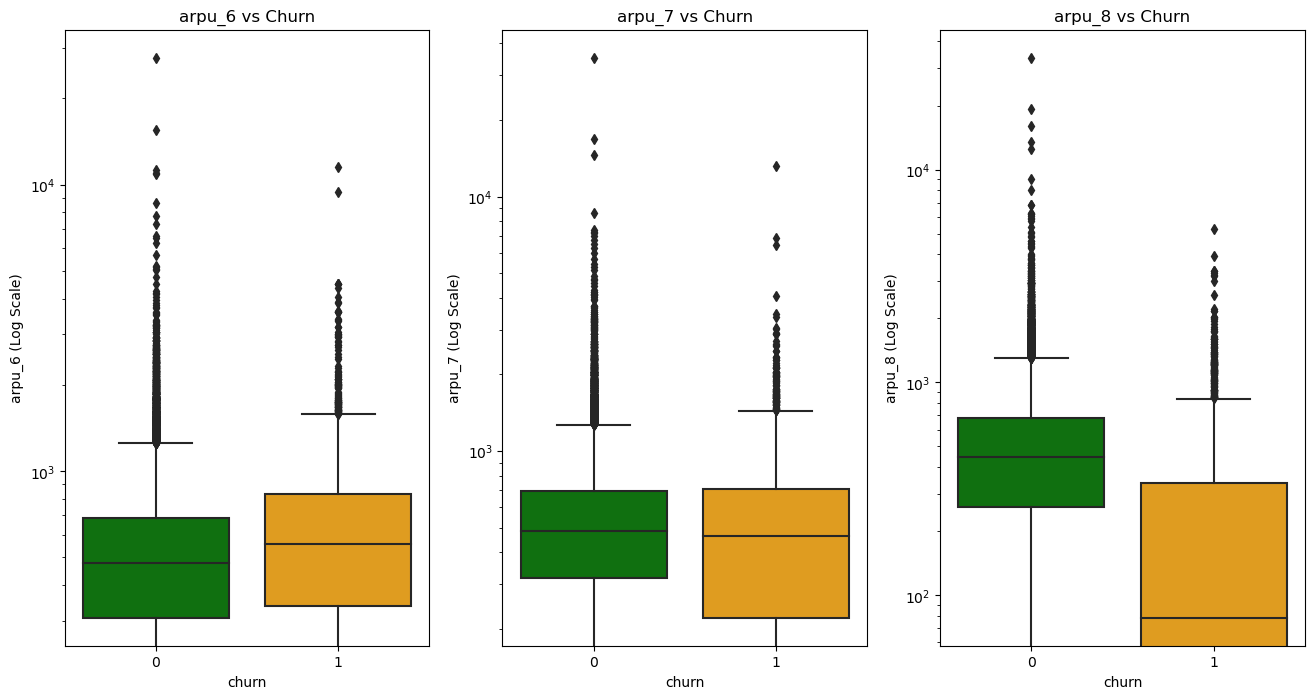

In [52]:
columns = ['arpu_6','arpu_7','arpu_8']
plot_num_columns(columns,'log')

- We can see from the plots that revenue generated by customers who are about to churn is highly unstable.
- Month 7 customers are most likely to churn compared to others.

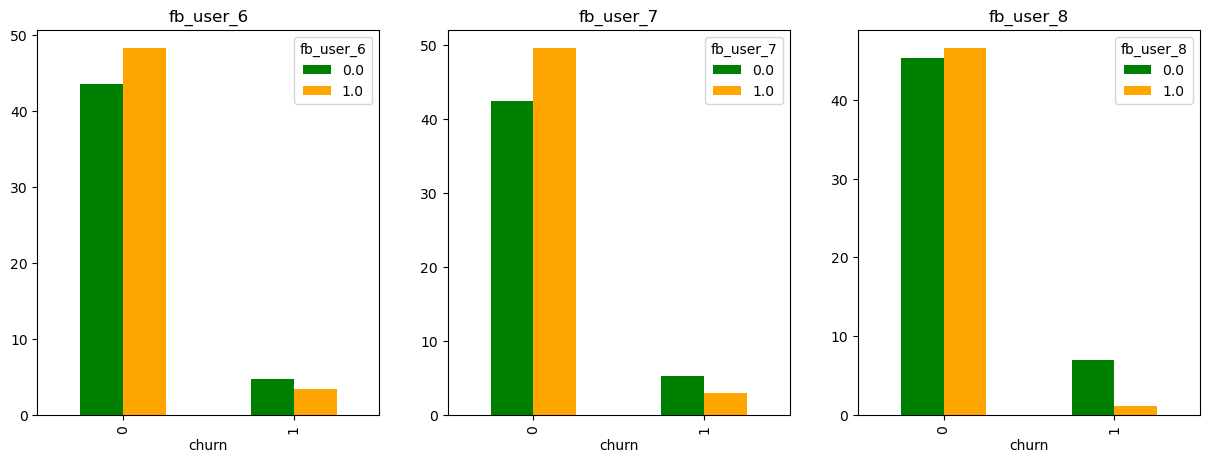

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for fb_user_6
(pd.crosstab(df['churn'], df['fb_user_6'], normalize='all') * 100).plot.bar(ax=axes[0], title='fb_user_6', color=['green', 'orange'])

# Plot for fb_user_7
(pd.crosstab(df['churn'], df['fb_user_7'], normalize='all') * 100).plot.bar(ax=axes[1], title='fb_user_7', color=['green', 'orange'])

# Plot for fb_user_8
(pd.crosstab(df['churn'], df['fb_user_8'], normalize='all') * 100).plot.bar(ax=axes[2], title='fb_user_8', color=['green', 'orange'])

plt.show()

- Customers who use less social media, such as Facebook, are more likely to churn.

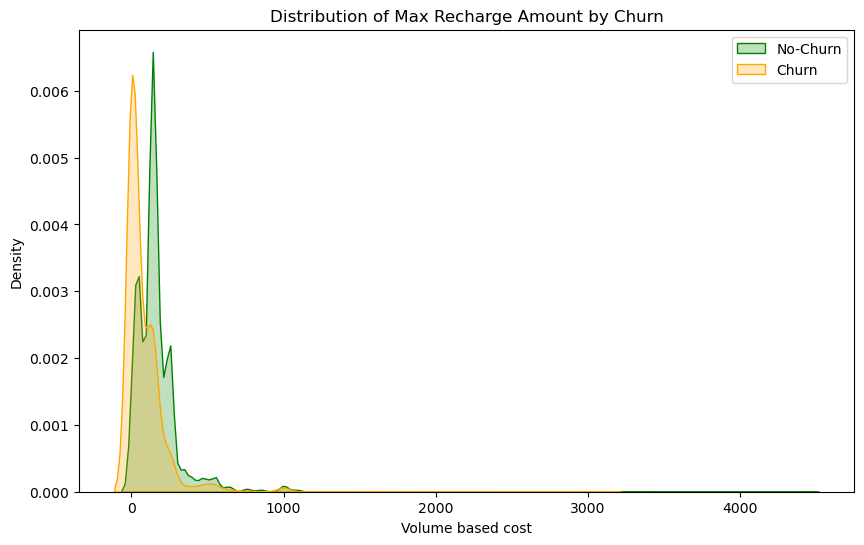

In [54]:
def plot_churn_vs_max_recharge_distribution(df):
    # Plot KDE distribution for churn vs max recharge amount
    plt.figure(figsize=(10, 6))
    
    ax = sns.kdeplot(df.max_rech_amt_8[df["churn"] == 0], color="Green", shade=True)
    ax = sns.kdeplot(df.max_rech_amt_8[df["churn"] == 1], ax=ax, color="Orange", shade=True)
    
    ax.legend(["No-Churn", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel('Volume based cost')
    ax.set_title('Distribution of Max Recharge Amount by Churn')
    
    plt.show()

# Call the function with the DataFrame
plot_churn_vs_max_recharge_distribution(df)

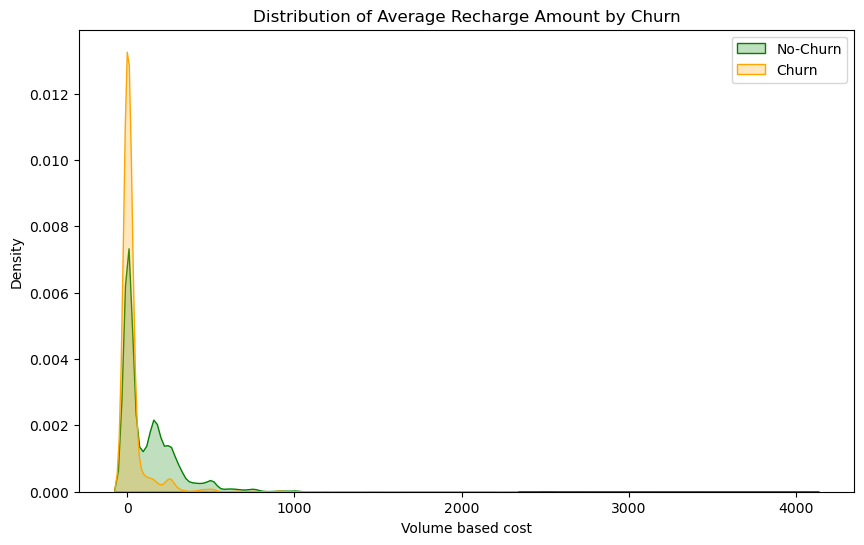

In [55]:
def plot_churn_vs_avg_recharge_distribution(df):
    # Plot KDE distribution for churn vs avg recharge amount
    plt.figure(figsize=(10, 6))
    
    ax = sns.kdeplot(df.av_rech_amt_data_8[df["churn"] == 0], color="Green", shade=True)
    ax = sns.kdeplot(df.av_rech_amt_data_8[df["churn"] == 1], ax=ax, color="Orange", shade=True)
    
    ax.legend(["No-Churn", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel('Volume based cost')
    ax.set_title('Distribution of Average Recharge Amount by Churn')
    
    plt.show()

# Call the function with the DataFrame
plot_churn_vs_avg_recharge_distribution(df)

In [56]:
df['arpu_7_8'] = (df['arpu_7'] + df['arpu_8'])/2

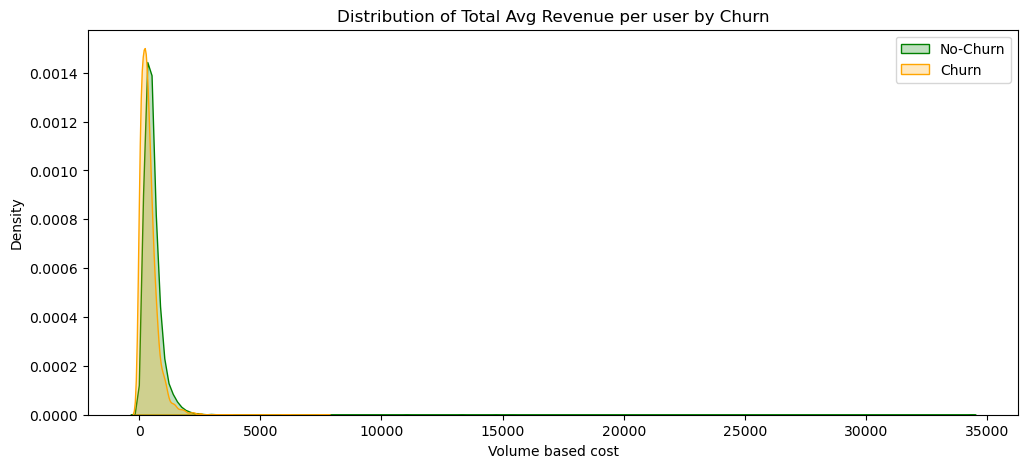

In [57]:
def plot_avg_rev_per_user_of_7_8(df):
    # Plot KDE distribution for churn vs avg revenue per user
    plt.figure(figsize=(12, 5))
    
    ax = sns.kdeplot(df.arpu_7_8[df["churn"] == 0] , color="Green", shade=True)
    ax = sns.kdeplot(df.arpu_7_8[df["churn"] == 1] , ax=ax, color="Orange", shade=True)
    
    ax.legend(["No-Churn", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel('Volume based cost')
    ax.set_title('Distribution of Total Avg Revenue per user by Churn')
   
    plt.show()

# Call the function with the DataFrame
plot_avg_rev_per_user_of_7_8(df)

- Churned customers are mostly concentrated in the 0 to 900 range, but a higher average revenue per user correlates with a lower churn rate.

In [58]:
df['avg_mou'] = (df['total_og_mou_7'] + df['total_og_mou_8'] + df['total_ic_mou_7'] + df['total_ic_mou_8'])/2

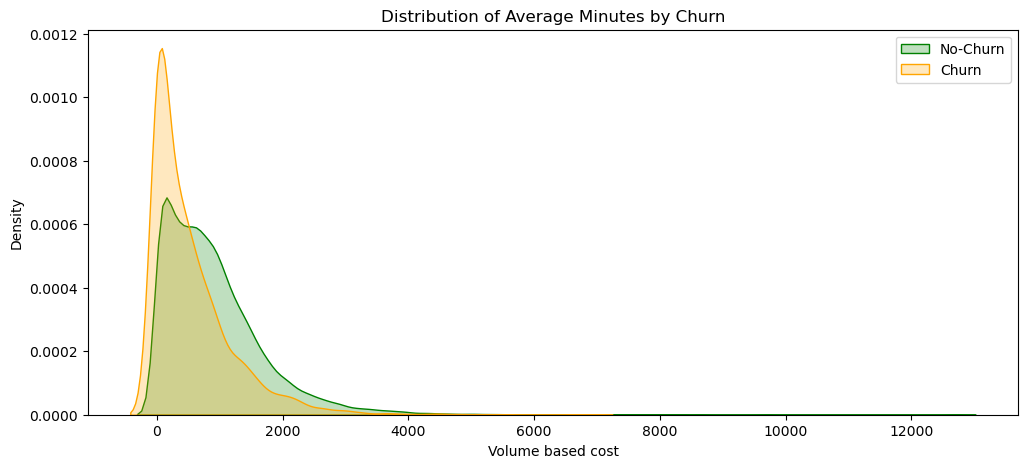

In [59]:
def plot_avg_mins_of_usage(df):
    # Plot KDE distribution for churn vs avg mins used
    plt.figure(figsize=(12, 5))
    
    ax = sns.kdeplot(df.avg_mou[df["churn"] == 0], color="Green", shade=True)
    ax = sns.kdeplot(df.avg_mou[df["churn"] == 1], ax=ax, color="Orange", shade=True)
    
    ax.legend(["No-Churn", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel('Volume based cost')
    ax.set_title('Distribution of Average Minutes by Churn')
    
    plt.show()

# Call the function with the DataFrame
plot_avg_mins_of_usage(df)

- Churned customers are mostly concentrated in the range of 0 to 2500, but a higher minutes of usage per user correlates with a lower churn rate.

Total out going minutes of usage (Month 6) vs Total out going minutes of usage (Month 8)

<AxesSubplot:xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

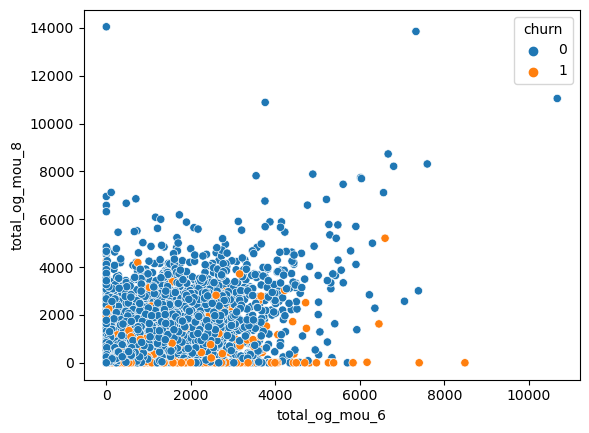

In [60]:
sns.scatterplot(x=df['total_og_mou_6'],y=df['total_og_mou_8'],hue=df['churn'])

Total out going minutes of usage (Month 7) vs Total out going minutes of usage (Month 8)

<AxesSubplot:xlabel='total_og_mou_7', ylabel='total_og_mou_8'>

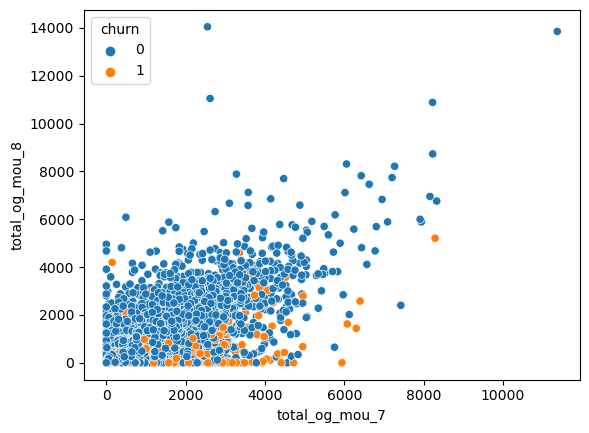

In [61]:
sns.scatterplot(x=df['total_og_mou_7'],y=df['total_og_mou_8'],hue=df['churn'])

- The customers with lower total_og_mou in the 6th and 8th months are more likely to churn than those with higher total_og_mou.

Age on network vs Total out going minutes of usage (Month 8)

<AxesSubplot:xlabel='aon', ylabel='total_og_mou_8'>

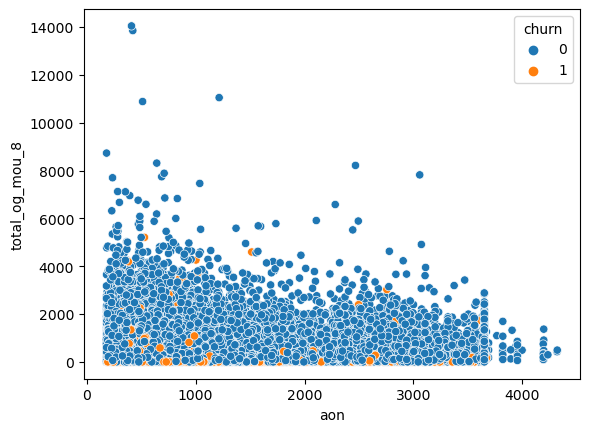

In [62]:
sns.scatterplot(x=df['aon'],y=df['total_og_mou_8'],hue=df['churn'])

- The customers who are more likely to churn have lower total_og_mou_8 and aon compared to those who are less likely to churn and have higher total_og_mou_8 and aon.

Max Recharge Amount (Month 6) vs Max Recharge Amount (Month 8) 

<AxesSubplot:xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

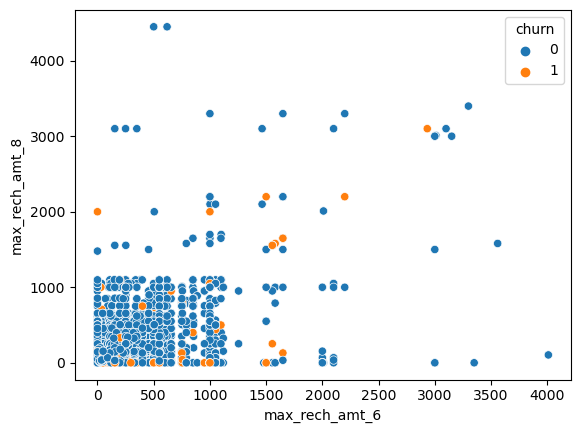

In [63]:
sns.scatterplot(x=df['max_rech_amt_6'],y=df['max_rech_amt_8'],hue=df['churn'])

EDA Summary:
- Churn rate is high if the customer is inactive for a period of time.
- Customers who spend less in the month 7 are more likely to churn.
- Customers who spend more in the month 6 are more likely to churn.
- We can see from the plots that revenue generated by customers who are about to churn is highly unstable.
- Month 7 customers are most likely to churn compared to others.

Correlation of the columns arpu_3g, arpu_2g and av_rech_amt_data in respect to the months of 6,7 and 8

In [64]:
print('\nCorrelation for month 6\n\n', df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print('\nCorrelation for month 7\n\n', df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print('\nCorrelation for month 8\n\n', df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())


Correlation for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.940079            0.821576
arpu_2g_6            0.940079   1.000000            0.850849
av_rech_amt_data_6   0.821576   0.850849            1.000000

Correlation for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.936447            0.804287
arpu_2g_7            0.936447   1.000000            0.829873
av_rech_amt_data_7   0.804287   0.829873            1.000000

Correlation for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.937701            0.813000
arpu_2g_8            0.937701   1.000000            0.835009
av_rech_amt_data_8   0.813000   0.835009            1.000000


- Based on the correlation table above, we can see that the attributes arpu_2g_(6,7,8) and arpu_3g_(6,7,8) are highly correlated with the attribute av_rech_amt_data_(6,7,8) for each month from 6 to 8.

- Therefore, it is recommended to drop the attributes arpu_2g_(6,7,8) and arpu_3g_(6,7,8) due to their high correlation with the attribute av_rech_amt_data_*.

In [65]:
df.drop(['arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8'], axis=1, inplace=True)

In [66]:
duplicates = df[df.duplicated(subset='mobile_number')]
print(duplicates)

Empty DataFrame
Columns: [mobile_number, arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_mou_6, std_og_mou_7, std_og_mou_8, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, og_others_6, og_others_7, og_others_8, total_og_mou_6, total_og_mou_7, total_og_mou_8, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2f_mou_6, loc_i

In [67]:
df.drop(['mobile_number'], axis=1, inplace=True)

- Dropping the mobile number column as all values are unique and provide no significant value to the dataset

In [68]:
# Compute and visualize quantiles for the range 90th to 100th percentile with a bar chart
df.quantile(np.arange(0.9,1.01,0.01)).style.bar()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_good_phase,churn,arpu_7_8,avg_mou
0.900000,994.099000,995.859000,977.345000,754.160000,784.480000,665.080000,895.830000,916.080000,823.680000,27.390000,14.290000,15.010000,50.430000,31.090000,28.880000,187.930000,190.840000,178.840000,419.480000,421.880000,398.510000,16.130000,16.290000,15.160000,4.210000,5.010000,4.580000,639.290000,636.210000,607.830000,567.060000,599.340000,475.360000,549.740000,586.660000,464.890000,1.660000,1.650000,1.280000,1114.810000,1153.580000,1002.860000,0.000000,0.000000,0.000000,15.940000,19.260000,17.610000,2.060000,0.000000,0.000000,1447.080000,1481.160000,1359.590000,147.860000,149.480000,140.460000,355.040000,353.440000,352.060000,38.010000,39.940000,36.610000,544.030000,545.960000,537.060000,31.210000,32.340000,28.240000,67.540000,69.480000,62.940000,4.030000,4.330000,3.780000,107.340000,109.930000,99.980000,665.110000,673.230000,650.230000,0.250000,0.000000,0.000000,13.360000,15.860000,13.550000,1.080000,1.480000,1.130000,23.000000,23.000000,21.000000,1181.000000,1194.000000,1148.000000,274.000000,274.000000,252.000000,250.000000,250.000000,225.000000,5.000000,5.000000,5.000000,252.000000,252.000000,252.000000,4.000000,5.000000,4.000000,1.000000,1.000000,1.000000,308.000000,344.000000,308.000000,409.790000,399.920000,318.950000,1089.230000,1171.250000,1105.170000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2793.000000,580.680000,611.310000,532.610000,0.900000,1120.000000,1374.000000,1088.000000,1991.500000,0.000000,953.857500,1858.260000
0.910000,1028.009000,1033.488000,1016.867000,810.310000,844.380000,718.580000,948.090000,961.260000,870.480000,33.430000,18.630000,19.180000,61.260000,39.360000,36.980000,

In [69]:
df.drop(['fb_user_6','fb_user_7','fb_user_8'], axis=1, inplace=True)

In [70]:
df.quantile(np.arange(0.9,1.01,0.01)).style.bar()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_good_phase,churn,arpu_7_8,avg_mou
0.900000,994.099000,995.859000,977.345000,754.160000,784.480000,665.080000,895.830000,916.080000,823.680000,27.390000,14.290000,15.010000,50.430000,31.090000,28.880000,187.930000,190.840000,178.840000,419.480000,421.880000,398.510000,16.130000,16.290000,15.160000,4.210000,5.010000,4.580000,639.290000,636.210000,607.830000,567.060000,599.340000,475.360000,549.740000,586.660000,464.890000,1.660000,1.650000,1.280000,1114.810000,1153.580000,1002.860000,0.000000,0.000000,0.000000,15.940000,19.260000,17.610000,2.060000,0.000000,0.000000,1447.080000,1481.160000,1359.590000,147.860000,149.480000,140.460000,355.040000,353.440000,352.060000,38.010000,39.940000,36.610000,544.030000,545.960000,537.060000,31.210000,32.340000,28.240000,67.540000,69.480000,62.940000,4.030000,4.330000,3.780000,107.340000,109.930000,99.980000,665.110000,673.230000,650.230000,0.250000,0.000000,0.000000,13.360000,15.860000,13.550000,1.080000,1.480000,1.130000,23.000000,23.000000,21.000000,1181.000000,1194.000000,1148.000000,274.000000,274.000000,252.000000,250.000000,250.000000,225.000000,5.000000,5.000000,5.000000,252.000000,252.000000,252.000000,4.000000,5.000000,4.000000,1.000000,1.000000,1.000000,308.000000,344.000000,308.000000,409.790000,399.920000,318.950000,1089.230000,1171.250000,1105.170000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2793.000000,580.680000,611.310000,532.610000,0.900000,1120.000000,1374.000000,1088.000000,1991.500000,0.000000,953.857500,1858.260000
0.910000,1028.009000,1033.488000,1016.867000,810.310000,844.380000,718.580000,948.090000,961.260000,870.480000,33.430000,18.630000,19.180000,61.260000,39.360000,36.980000,205.140000,207.030000,194.660000,443.290000,449.510000,42

In [71]:
# Define the range of percentiles from 90th to 100th with a step of 0.01
percentiles_range = np.arange(0.9, 1.01, 0.01)

# Compute quantiles for the specified range on the DataFrame 'data'
quantiles_data = df.quantile(percentiles_range)

# Style the output with a bar chart for better visualization
styled_quantiles_data = quantiles_data.style.bar()

# Display the styled DataFrame
styled_quantiles_data

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_good_phase,churn,arpu_7_8,avg_mou
0.900000,994.099000,995.859000,977.345000,754.160000,784.480000,665.080000,895.830000,916.080000,823.680000,27.390000,14.290000,15.010000,50.430000,31.090000,28.880000,187.930000,190.840000,178.840000,419.480000,421.880000,398.510000,16.130000,16.290000,15.160000,4.210000,5.010000,4.580000,639.290000,636.210000,607.830000,567.060000,599.340000,475.360000,549.740000,586.660000,464.890000,1.660000,1.650000,1.280000,1114.810000,1153.580000,1002.860000,0.000000,0.000000,0.000000,15.940000,19.260000,17.610000,2.060000,0.000000,0.000000,1447.080000,1481.160000,1359.590000,147.860000,149.480000,140.460000,355.040000,353.440000,352.060000,38.010000,39.940000,36.610000,544.030000,545.960000,537.060000,31.210000,32.340000,28.240000,67.540000,69.480000,62.940000,4.030000,4.330000,3.780000,107.340000,109.930000,99.980000,665.110000,673.230000,650.230000,0.250000,0.000000,0.000000,13.360000,15.860000,13.550000,1.080000,1.480000,1.130000,23.000000,23.000000,21.000000,1181.000000,1194.000000,1148.000000,274.000000,274.000000,252.000000,250.000000,250.000000,225.000000,5.000000,5.000000,5.000000,252.000000,252.000000,252.000000,4.000000,5.000000,4.000000,1.000000,1.000000,1.000000,308.000000,344.000000,308.000000,409.790000,399.920000,318.950000,1089.230000,1171.250000,1105.170000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2793.000000,580.680000,611.310000,532.610000,0.900000,1120.000000,1374.000000,1088.000000,1991.500000,0.000000,953.857500,1858.260000
0.910000,1028.009000,1033.488000,1016.867000,810.310000,844.380000,718.580000,948.090000,961.260000,870.480000,33.430000,18.630000,19.180000,61.260000,39.360000,36.980000,205.140000,207.030000,194.660000,443.290000,449.510000,42

In [72]:
# Columns with outliers 
change_99_1 = df.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = change_99_1 > 100
columns_with_outliers = change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['arpu_6' 'arpu_7' 'arpu_8' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'roam_ic_mou_6'
 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7'
 'roam_og_mou_8' 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8'
 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6'
 'loc_og_mou_7' 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7'
 'std_og_t2t_mou_8' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2f_mou_6' 'std_og_t2f_mou_7'
 'std_og_t2f_mou_8' 'std_og_mou_6' 'std_og_mou_7' 'std_og_mou_8'
 'isd_og_mou_6' 'isd_og_mou_7' 'isd_og_mou_8' 'spl_og_mou_6'
 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6' 'og_others_7' 'og_others_8'
 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'
 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6'
 '

In [73]:
def cap_outliers(df, columns_with_outliers, quantile_threshold=0.99):
    outlier_treatment = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])

    for col in columns_with_outliers:
        outlier_threshold = df[col].quantile(quantile_threshold)
        condition = df[col] > outlier_threshold

        outlier_treatment = outlier_treatment.append({
            'Column': col,
            'Outlier Threshold': outlier_threshold,
            'Outliers replaced': df.loc[condition, col].shape[0]
        }, ignore_index=True)

        df.loc[condition, col] = outlier_threshold

    return df, outlier_treatment

In [74]:
df, outlier_treatment_result = cap_outliers(df, columns_with_outliers)
print(outlier_treatment_result)

                            Column  Outlier Threshold Outliers replaced
0                           arpu_6           1985.115               300
1                           arpu_7           1999.500               300
2                           arpu_8           1986.622               300
3                      onnet_mou_6           2151.740               300
4                      onnet_mou_7           2201.960               300
5                      onnet_mou_8           2159.110               300
6                     offnet_mou_6           2326.360               300
7                     offnet_mou_7           2410.890               300
8                     offnet_mou_8           2193.130               300
9                    roam_ic_mou_6            342.440               300
10                   roam_ic_mou_7            280.460               300
11                   roam_ic_mou_8            282.190               300
12                   roam_og_mou_6            530.710           

Model Building

In [75]:
# Extract features (X) by dropping the 'churn' column from the DataFrame
X = df.drop(['churn'],axis=1)

In [76]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_good_phase,arpu_7_8,avg_mou
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,214.3095,2.720
7,1069.180,1349.850,1986.622,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,51.38,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,2341,1000,790,951,0,0,565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1879.8280,973.090
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,43

In [77]:
# Extract the target variable (y) by selecting the 'churn' column from the DataFrame
y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [78]:
# Split the dataset into training and testing sets using the train_test_split function from scikit-learn
# X_train and X_test are the feature matrices for training and testing, respectively
# y_train and y_test are the corresponding target variables for training and testing, respectively
# The train_size parameter specifies the proportion of the dataset to include in the training split (in this case, 70%)
# The random_state parameter sets a seed for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=50)

In [79]:
# Create an instance of the SMOTE (Synthetic Minority Over-sampling Technique) algorithm
# SMOTE is used for oversampling the minority class to address class imbalance in the dataset
# The random_state parameter sets a seed for reproducibility, and k_neighbors specifies the number of nearest neighbors to use
smt = SMOTE(random_state=50, k_neighbors=4)

In [80]:
# Use SMOTE to oversample the minority class in the training set
# X_train_resampled and y_train_resampled contain the resampled feature matrix and target variable, respectively
# The fit_resample method applies the SMOTE algorithm to the training data
X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_good_phase,arpu_7_8,avg_mou
0,811.023,559.166,678.970,239.79,133.19,75.99,521.58,404.86,555.61,0.0,0.00,0.00,0.0,0.00,0.00,239.79,133.19,75.99,508.53,402.58,551.38,6.63,2.28,4.13,0.0,0.0,0.1,754.96,538.06,631.51,0.00,0.00,0.00,6.41,0.00,0.00,0.0,0.00,0.0,6.41,0.00,0.00,0.0,0.0,0.0,1.36,5.69,3.86,6.96,0.0,0.0,769.71,543.76,635.38,21.98,18.36,26.73,246.38,172.11,169.58,0.48,0.26,1.81,268.84,190.74,198.13,0.00,0.00,0.00,0.00,0.73,0.56,0.00,0.00,0.00,0.00,0.73,0.56,268.84,191.48,198.69,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,11,8,7,940,660,908,110,110,130,110,110,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,800,0.00,0.00,0.00,0.0,0.0,0.0,0.0,800.0,619.068,784.655
1,57.782,109.175,105.503,2.31,1.13,0.00,19.53,5.26,0.41,0.0,0.00,0.00,0.0,0.00,0.00,2.31,1.13,0.00,19.53,2.84,0.41,0.00,0.00,0.00,0.0,0.0,0.0,21.84,3.98,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.16,0.46,1.38,0.0,0.0,23.23,7.14,0.88,1.23,0.53,5.01,124.68,42.86,76.36,0.00,5.29,0.00,125.91,48.69,81.38,1.16,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,1.69,0.00,0.00,139.04,48.69,81.38,0.00,0.00,0.0,11.43,0.0,0.0,0.00,0.00,0.00,5,12,9,62,125,123,25,25,25,14,25,17,3.0,9.0,7.0,25.0,25.0,25.0,3.0,9.0,7.0,0.0,0.0,0.0,64.0,225.0,148.0,187.84,479.75,587.20,0.00,21.96,0.00,0.0,0.0,0.0,0,0,0,3,9,7,0,0,0,0,0,0,1111,0.00,36.31,0.00,0.0,192.0,2025.0,1036.0,1202.0,107.339,69.045
2,773.584,654.746,363.530,662.36,488.73,487.13,160.03,77.64,90.34,0.0,35.58,20.84,0.0,20.78,20.99,73.16,55.73,13.11,67.28,21.88,16.24,2.78,9.53,6.08,0.0,0.0,0.0,143.23,87.14,35.44,589.19,418.33,468.99,89.96,22.18,52.03,0.0,1.78,0.0,679.16,442.29,521.03,0.0,0.0,0.0,0.00,16.14,0.00,0.00,0.0,0.0,822.39,545.59,556.48,26.29,12.53,0.85,150.19,90.86,39.41,55.68

In [81]:
# Create an instance of the StandardScaler class from scikit-learn
# StandardScaler is used to standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

In [82]:
# Extract the column names of the features in the training set (X_train)
# scaler_cols is a list containing the names of all columns in the feature matrix
scaler_cols = X_train.columns.to_list()

In [83]:
# Use the StandardScaler instance (scaler) to standardize the selected columns in the training set (X_train)
# The fit_transform method computes the mean and standard deviation and then standardizes the selected columns
# The result is assigned back to the corresponding columns in X_train
X_train[scaler_cols] = scaler.fit_transform(X_train[scaler_cols])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_good_phase,arpu_7_8,avg_mou
4773,0.732921,0.028647,0.476958,-0.029650,-0.299545,-0.382378,0.362108,0.083144,0.568219,-0.27658,-0.250606,-0.254122,-0.287502,-0.267098,-0.266806,1.110499,0.377829,0.044894,1.671386,1.184697,2.006801,0.070058,-0.248057,-0.083562,-0.34072,-0.353191,-0.313202,1.577096,0.916639,1.313345,-0.453002,-0.457950,-0.418385,-0.469286,-0.484193,-0.452672,-0.241667,-0.237173,-0.23398,-0.597337,-0.611736,-0.553296,-0.159814,-0.161447,-0.151775,-0.346131,-0.056603,-0.162020,4.117809,0.0,0.0,0.268743,-0.107724,0.153373,-0.378819,-0.415188,-0.308266,0.552897,0.144950,0.161803,-0.430575,-0.436125,-0.382559,0.163858,-0.136671,-0.069915,-0.384566,-0.381056,-0.362913,-0.459307,-0.443404,-0.433485,-0.278145,-0.278366,-0.282160,-0.495116,-0.481736,-0.467666,-0.044948,-0.302912,-0.234429,-0.430241,-0.223926,-0.264796,-0.252850,-0.260448,-0.251062,-0.255672,-0.256803,-0.254544,-0.085365,-0.419673,-0.337360,0.678566,0.029077,0.737743,-0.367172,-0.377216,-0.179802,0.124004,0.124550,0.402848,-0.643763,-0.654748,-0.606444,-0.752013,-0.762938,-0.703044,-0.525363,-0.547495,-0.506125,-0.452482,-0.450686,-0.420745,-0.749320,-0.760259,-0.685238,-0.440107,-0.432534,-0.400474,-0.474436,-0.488440,-0.469111,-0.115826,-0.112183,-0.105463,-0.398984,-0.409273,-0.382269,-0.449410,-0.472826,-0.441309,-0.380287,-0.383187,-0.365578,-0.290059,-0.273534,-0.259931,-0.424975,-0.452223,-0.451448,-0.430469,-0.216926,-0.487980,-0.490078,-0.441050,-0.338336,0.279040,-0.107633
24832,-1.362529,-1.220907,-1.021891,-0.618751,-0.618192,-0.577378,-0.795977,-0.821264,-0.789048,-0.27658,-0.250606,-0.254122,-0.287502,-0.267098,-0.266806,-0.493314,-0.500802,-0.507760,-0.646509,-0.740399,-0.717136,-0.411444,-0.413069,-0.406209,-0.34072,-0.353191,-0.336104,-0.685902,-0.756275,-0.734485,-0.453002,-0.457950,-0.418385,-0.48

In [84]:
# Use the previously fitted StandardScaler instance (scaler) to transform the selected columns in the testing set (X_test)
# The transform method applies the same mean and standard deviation computed during training to standardize the testing set
# The result is assigned back to the corresponding columns in X_test
X_test[scaler_cols] = scaler.transform(X_test[scaler_cols])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_good_phase,arpu_7_8,avg_mou
55440,0.240581,1.675226,-0.281841,-0.357243,-0.444222,-0.129126,0.300773,0.207670,-0.055483,-0.27658,-0.250606,-0.254122,-0.287502,-0.267098,-0.266806,0.154343,-0.026224,0.580093,0.909562,0.936583,0.535400,4.152289,3.526230,2.624165,-0.340720,-0.353191,-0.336104,0.817495,0.728386,0.698867,-0.425843,-0.455842,-0.343370,-0.257130,-0.362588,-0.431370,-0.241667,1.306339,-0.23398,-0.445966,-0.518217,-0.493371,0.573388,0.122941,0.144507,-0.467860,-0.295744,-0.489599,-0.378759,0.0,0.0,0.007164,-0.119975,-0.100403,0.013127,-0.314603,-0.207915,0.228977,-0.142596,0.183135,2.528979,0.035589,0.701506,0.425235,-0.233596,0.098482,-0.279208,-0.381056,-0.322823,0.249153,-0.018038,-0.093112,-0.249601,1.030652,-0.206555,0.010387,-0.095879,-0.227447,0.320943,-0.276658,0.076422,-0.430241,-0.223926,-0.264796,-0.148026,-0.260448,0.842356,-0.255672,-0.256803,-0.254544,-0.671934,-0.074254,-0.925173,0.244212,1.595019,-0.696259,0.573583,0.535345,0.652358,1.389721,1.373314,1.530422,-0.245981,0.789132,-0.218077,1.755718,1.726013,1.826455,-0.525363,-0.547495,-0.506125,0.706738,3.915318,0.724213,0.754396,4.353724,0.784156,-0.426027,-0.409311,-0.348037,1.015660,5.235004,1.863237,-0.115826,-0.112183,-0.105463,-0.398984,-0.409273,-0.382269,-0.44941,-0.472826,-0.441309,1.467901,4.973097,1.492844,-0.290059,-0.273534,-0.259931,-0.577867,2.899160,5.056208,0.809587,-0.216926,-0.185812,3.605332,-0.168171,2.319332,0.720356,-0.147998
18146,-1.097750,-1.004461,-1.007291,-0.552221,-0.594546,-0.576454,-0.798446,-0.775591,-0.787605,-0.27658,-0.250606,-0.254122,-0.287502,-0.267098,-0.266806,-0.312186,-0.435600,-0.505142,-0.659023,-0.631560,-0.714219,-0.298149,-0.413069,-0.406209,-0.340720,-0.353191,-0.336104,-0.606417,-0.654787,-0.731402,-0.453002,-0.457950,-0.418385,-0.487508,-0.484193,-0.452672,-0.2416

In [85]:
# Use the previously fitted StandardScaler instance (scaler) to transform the selected columns in the testing set (X_test)
# The transform method applies the same mean and standard deviation computed during training to standardize the testing set
# The result is assigned back to the corresponding columns in X_test
pca = PCA(random_state=50)

In [86]:
# Fit the PCA instance (pca) to the training set (X_train)
# This step computes the principal components and other parameters necessary for dimensionality reduction
pca.fit(X_train)

PCA(random_state=50)

In [87]:
# Principal components
pca.components_

array([[ 1.34120545e-01,  1.48753372e-01,  1.42448584e-01, ...,
        -2.87115558e-02,  1.58001837e-01,  2.00544109e-01],
       [ 4.00288219e-02,  4.54504181e-02,  6.74864243e-02, ...,
         1.22544692e-01,  6.15460988e-02,  5.47154016e-03],
       [ 1.03415129e-01,  1.44500388e-01,  1.42165058e-01, ...,
         1.93615844e-01,  1.55493961e-01,  7.32727092e-02],
       ...,
       [ 1.28044572e-04, -1.23294326e-04, -4.91215950e-05, ...,
        -1.33763791e-03,  8.64089156e-05,  1.38073372e-04],
       [-0.00000000e+00, -3.13796576e-16, -3.22557886e-16, ...,
        -6.05002359e-17,  6.17336827e-16, -1.37132895e-17],
       [-0.00000000e+00,  2.37689492e-17, -7.00038732e-17, ...,
         1.29541325e-16,  1.87299762e-16,  1.71402369e-16]])

In [88]:
# Calculate the cumulative sum of explained variance ratios obtained from the PCA
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

[0.13071226 0.22931697 0.29716111 0.3561109  0.39760266 0.42874988
 0.45590282 0.48118319 0.50571747 0.52814157 0.55023461 0.57005604
 0.58937094 0.60578683 0.62125782 0.63631531 0.65068705 0.66497419
 0.67827014 0.6913384  0.70274932 0.71316512 0.72309578 0.73251989
 0.741466   0.7501212  0.75841439 0.76620264 0.7737018  0.78108017
 0.78824808 0.79534658 0.80216376 0.80845625 0.81449017 0.82031103
 0.82608294 0.83176853 0.83742091 0.84286306 0.84819772 0.85342245
 0.85834723 0.86321937 0.86796818 0.87243811 0.87684378 0.88105636
 0.88517958 0.88915178 0.89305422 0.89692037 0.90075746 0.90452598
 0.90805892 0.91145901 0.91471828 0.91772966 0.92071718 0.92359239
 0.92639527 0.92901528 0.93159764 0.93415526 0.93662948 0.93907054
 0.94141503 0.94363278 0.94579247 0.94789184 0.94995338 0.95199706
 0.95401751 0.95601156 0.95797941 0.959928   0.96184848 0.96368706
 0.96551023 0.96728361 0.96898254 0.9706662  0.97221879 0.97374137
 0.975209   0.9766645  0.97805621 0.97938643 0.98068185 0.9819

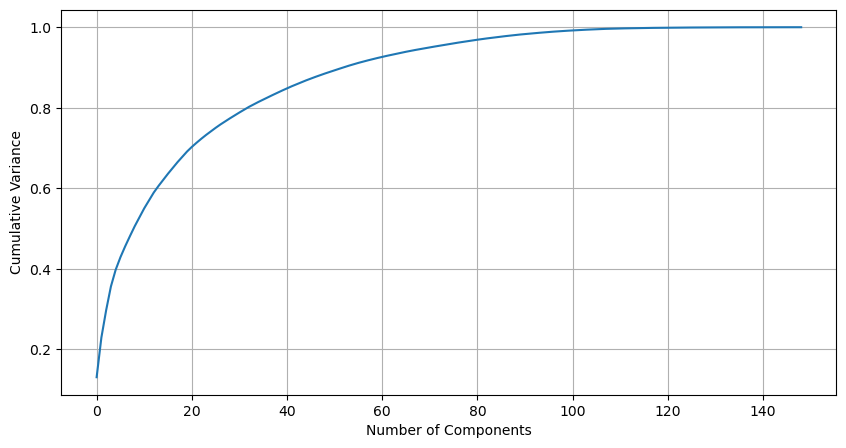

In [89]:
# Create a plot to visualize the cumulative variance explained by the principal components
fig = plt.figure(figsize = (10,5))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

In [90]:
# Create an instance of the IncrementalPCA (Incremental Principal Component Analysis) class from scikit-learn
# IncrementalPCA is a variant of PCA designed for large datasets that don't fit into memory
# The n_components parameter specifies the number of principal components to retain
pca_final = IncrementalPCA(n_components=50)

In [91]:
# Apply the IncrementalPCA transformation to the training set (X_train)
# X_train_pca contains the reduced-dimensional representation of the training set using the specified number of principal components
X_train_pca = pca_final.fit_transform(X_train)

In [92]:
# Apply the previously fitted IncrementalPCA transformation to the testing set (X_test)
# X_test_pca contains the reduced-dimensional representation of the testing set using the same principal components learned from the training set
X_test_pca = pca_final.transform(X_test)

In [93]:
def logistic_regression_cv(X_train, y_train):
    # Creating a KFold object with 5 splits for cross-validation
    folds = KFold(n_splits=5, shuffle=True, random_state=4)

    # Specify hyperparameter values for tuning
    params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

    # Specify the scoring metric as recall, as the focus is on achieving higher sensitivity rather than accuracy
    model_cv = GridSearchCV(estimator=LogisticRegression(),
                            param_grid=params, 
                            scoring='recall', 
                            cv=folds, 
                            verbose=1,
                            return_train_score=True)

    # Fit the model using cross-validated grid search
    model_cv.fit(X_train, y_train)

    return model_cv

In [94]:
# Apply logistic_regression_cv function to perform logistic regression with cross-validated grid search
# The function is applied to the training set after PCA dimensionality reduction (X_train_pca) and the target variable (y_train)
model_cv_result = logistic_regression_cv(X_train_pca, y_train)
model_cv_result

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [95]:
# Create a DataFrame (cv_results) to store the cross-validated grid search results
# The DataFrame includes information about various hyperparameters, scores, and run times obtained during the grid search
cv_results = pd.DataFrame(model_cv_result.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.100567,0.010363,0.002600,0.000490,0.01,{'C': 0.01},0.225000,0.229462,0.234463,0.193906,0.214485,0.219463,0.014378,6,0.234758,0.223099,0.231156,0.239538,0.217579,0.229226,0.007923
1,0.126878,0.014791,0.002398,0.000489,0.1,{'C': 0.1},0.246875,0.263456,0.254237,0.240997,0.259053,0.252924,0.008112,5,0.259986,0.263271,0.266332,0.270563,0.244957,0.261022,0.008757
2,0.169698,0.048978,0.002800,0.000748,1,{'C': 1},0.253125,0.266289,0.259887,0.243767,0.261838,0.256981,0.007850,4,0.264891,0.267575,0.271357,0.277778,0.252882,0.266897,0.008236
3,0.135586,0.008990,0.002197,0.000399,10,{'C': 10},0.253125,0.266289,0.262712,0.243767,0.261838,0.257546,0.008136,3,0.265592,0.268293,0.272075,0.278499,0.251441,0.267180,0.008984
4,0.128079,0.018398,0.002600,0.000493,100,{'C': 100},0.256250,0.266289,0.262712,0.243767,0.261838,0.258171,0.007888,1,0.265592,0.268293,0.272075,0.277778,0.251441,0.267036,0.008805
5,0.122037,0.010493,0.002199,0.000400,1000,{'C': 1000},0.256250,0.266289,0.262712,0.243767,0.261838,0.258171,0.007888,1,0.265592,0.268293,0.272075,0.277778,0.251441,0.267036,0.008805


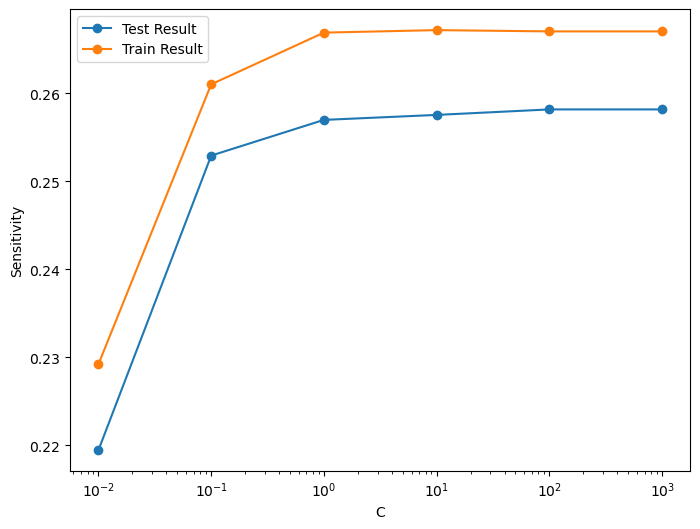

In [96]:
# Define a function named plot_cv_results to visualize cross-validated grid search results
# The function plots sensitivity scores on the y-axis against different values of the hyperparameter C on the x-axis
# Both mean test scores and mean train scores are plotted for comparison
# The x-axis is plotted on a logarithmic scale for better visibility
def plot_cv_results(cv_results):
    plt.figure(figsize=(8, 6))
    
    # Plot mean test scores
    plt.plot(cv_results['param_C'], cv_results['mean_test_score'], marker='o', label='Test Result')
    
    # Plot mean train scores
    plt.plot(cv_results['param_C'], cv_results['mean_train_score'], marker='o', label='Train Result')
    
    plt.xlabel('C')
    plt.ylabel('Sensitivity')
    plt.legend(['Test Result', 'Train Result'], loc='upper left')
    plt.xscale('log')
    plt.show()

# Call the plot_cv_results function with the cross-validated grid search results
plot_cv_results(model_cv_result.cv_results_)


In [97]:
# Obtain the best sensitivity score and corresponding value of C from the cross-validated grid search results
best_score = model_cv_result.best_score_
C_Score = model_cv_result.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, C_Score))

 The highest test sensitivity is 0.25817131387579006 at C = 100


In [98]:
# Create an instance of the LogisticRegression class with the best hyperparameter C obtained from the grid search
logistic_pca = LogisticRegression(C = C_Score)

In [99]:
# Fit the logistic regression model with the best hyperparameter to the training set after PCA dimensionality reduction
# log_pca_model is the trained logistic regression model
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [100]:
# Use the trained logistic regression model to predict the target variable on the training set after PCA dimensionality reduction
y_train_pred = log_pca_model.predict(X_train_pca)

In [101]:
# Use scikit-learn's confusion_matrix function to calculate the confusion matrix
# The confusion matrix compares the predicted values (y_train_pred) with the actual target values (y_train)
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[19012   241]
 [ 1290   457]]


In [102]:
# Extract components from the confusion matrix for further analysis
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.9270952380952381
Sensitivity: 0.2615912993703492
Specificity: 0.9874824702643744


In [104]:
# Use the trained logistic regression model to predict the target variable on the testing set after PCA dimensionality reduction
y_test_pred = log_pca_model.predict(X_test_pca)

In [105]:
# Use scikit-learn's confusion_matrix function to calculate the confusion matrix on the testing set
# The confusion matrix compares the predicted values (y_test_pred) with the actual target values (y_test)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[8197  110]
 [ 499  195]]


In [106]:
# Extract components from the confusion matrix for further analysis on the testing set
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.9323408510165537
Sensitivity: 0.28097982708933716
Specificity: 0.9867581557722402


Model 2 : Logistic Regression

In [108]:
def train_logistic_regression(X_train, y_train, random_state=70):
    """
    Train a logistic regression model with class-weight balancing.

    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - random_state: Random seed for reproducibility

    Returns:
    - Trained logistic regression model
    - Predicted probabilities for the positive class on training set
    - Predicted probabilities for the positive class on test set
    """
    # Create a logistic regression model with class-weight balancing
    model = LogisticRegression(random_state=random_state, class_weight='balanced')

    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    return model, y_train_pred, y_test_pred


trained_model, y_train_pred, y_test_pred = train_logistic_regression(X_train, y_train)

In [109]:
# Convert the predicted values for the target variable on the training set to a pandas Series
# This is done to preserve the original index of the training set (X_train)
y_train_pred = pd.Series(y_train_pred,index = X_train.index, )

In [110]:
# Convert the predicted values for the target variable on the testing set to a pandas Series
# This is done to preserve the original index of the testing set (X_test)
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [111]:
def model_metrics(matrix):
    # Extract components from the confusion matrix
    TN = matrix[0, 0]
    TP = matrix[1, 1]
    FP = matrix[0, 1]
    FN = matrix[1, 0]
    
    # Calculate and print various model evaluation metrics
    # Accuracy
    accuracy = round((TP + TN) / (TP + TN + FP + FN), 3)
    print('Accuracy:', accuracy)

    # Sensitivity / True Positive Rate / Recall
    sensitivity = round(TP / (FN + TP), 3)
    print('Sensitivity / True Positive Rate / Recall:', sensitivity)

    # Specificity / True Negative Rate
    specificity = round(TN / (TN + FP), 3)
    print('Specificity / True Negative Rate:', specificity)

    # Precision / Positive Predictive Value
    precision = round(TP / (TP + FP), 3)
    print('Precision / Positive Predictive Value:', precision)

    # F1-score
    f1_score = round(2 * precision * sensitivity / (precision + sensitivity), 3)
    print('F1-score:', f1_score)

confusion_matrix = np.array([[100, 20], [10, 50]])
model_metrics(confusion_matrix)


Accuracy: 0.833
Sensitivity / True Positive Rate / Recall: 0.833
Specificity / True Negative Rate: 0.833
Precision / Positive Predictive Value: 0.714
F1-score: 0.769


In [112]:
def classify_predictions(predictions, threshold=0.3):
    """
    Classify predicted probabilities based on a specified threshold.
    
    Parameters:
    - predictions: Pandas Series or NumPy array containing predicted probabilities.
    - threshold: Classification threshold.

    Returns:
    - Pandas Series of binary classifications.
    """
    return predictions.map(lambda x: 1 if x > threshold else 0)


In [113]:
classification_threshold = 0.3

In [114]:
# Apply a classification threshold to the predicted probabilities to obtain binary predictions
# y_train_pred_classified contains the binary predictions for the training set
y_train_pred_classified = classify_predictions(y_train_pred, threshold=classification_threshold)

In [115]:
# y_test_pred_classified contains the binary predictions for the testing set
y_test_pred_classified = classify_predictions(y_test_pred, threshold=classification_threshold)

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
# Use scikit-learn's confusion_matrix function to calculate the confusion matrix for the training set
# The confusion matrix compares the classified predicted values (y_train_pred_classified) with the actual target values (y_train)
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)

Confusion Matrix for train:
 [[12944  6309]
 [  133  1614]]


In [118]:
# Use scikit-learn's confusion_matrix function to calculate the confusion matrix for the testing set
# The confusion matrix compares the classified predicted values (y_test_pred_classified) with the actual target values (y_test)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)


Confusion Matrix for test: 
 [[5647 2660]
 [  63  631]]


In [119]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy: 0.693
Sensitivity / True Positive Rate / Recall: 0.924
Specificity / True Negative Rate: 0.672
Precision / Positive Predictive Value: 0.204
F1-score: 0.334


Test Performance : 

Accuracy: 0.697
Sensitivity / True Positive Rate / Recall: 0.909
Specificity / True Negative Rate: 0.68
Precision / Positive Predictive Value: 0.192
F1-score: 0.317


In [120]:
def generate_thresholded_predictions(predictions, threshold_values):
    """
    Generate thresholded binary predictions for different probability thresholds.

    Parameters:
    - predictions: Pandas Series or NumPy array containing predicted probabilities.
    - threshold_values: List of threshold values between 0 and 1.

    Returns:
    - Pandas DataFrame with thresholded predictions for each threshold value.
    """
    thresholded_predictions = pd.DataFrame(index=predictions.index)

    def thresholder(x, thresh):
        return 1 if x > thresh else 0

    for thresh in threshold_values:
        column_name = f'Threshold_{thresh}'
        thresholded_predictions[column_name] = predictions.map(lambda x: thresholder(x, thresh))

    return thresholded_predictions


threshold_values = [float(x) / 10 for x in range(10)]
y_train_pred_thres = generate_thresholded_predictions(y_train_pred, threshold_values)


In [121]:
def calculate_metrics_for_thresholds(predictions, true_labels, threshold_values):
    """
    Calculate sensitivity, specificity, and accuracy for each threshold.

    Parameters:
    - predictions: Pandas DataFrame with thresholded predictions for each threshold value.
    - true_labels: True labels for the dataset.
    - threshold_values: List of threshold values between 0 and 1.

    Returns:
    - Pandas DataFrame containing sensitivity, specificity, and accuracy for each threshold.
    """
    metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

    # Function for calculation of metrics for each threshold
    def model_metrics_thres(matrix):
        TN, TP, FP, FN = matrix[0][0], matrix[1][1], matrix[0][1], matrix[1][0]
        accuracy = round((TP + TN) / float(TP + TN + FP + FN), 3)
        sensitivity = round(TP / float(FN + TP), 3)
        specificity = round(TN / float(TN + FP), 3)
        return sensitivity, specificity, accuracy

    # Generating a data frame for metrics for each threshold
    for thres, column in zip(threshold_values, predictions.columns.to_list()):
        confusion = confusion_matrix(true_labels, predictions.loc[:, column])
        sensitivity, specificity, accuracy = model_metrics_thres(confusion)

        metrics_df = metrics_df.append({
            'sensitivity': sensitivity,
            'specificity': specificity,
            'accuracy': accuracy
        }, ignore_index=True)

    metrics_df.index = threshold_values
    return metrics_df

In [122]:
# Calculate metrics for various thresholds and store the results in a DataFrame
# y_train_pred_thres is a DataFrame containing predicted probabilities for different thresholds
# threshold_values is a list of threshold values to evaluate
metrics_df = calculate_metrics_for_thresholds(y_train_pred_thres, y_train, threshold_values)

In [123]:
metrics_df 

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.083
0.1,0.978,0.412,0.459
0.2,0.955,0.567,0.600
0.3,0.924,0.672,0.693
0.4,0.884,0.753,0.763
0.5,0.843,0.817,0.820
0.6,0.792,0.872,0.865
0.7,0.728,0.914,0.898
0.8,0.612,0.949,0.921
0.9,0.296,0.983,0.926


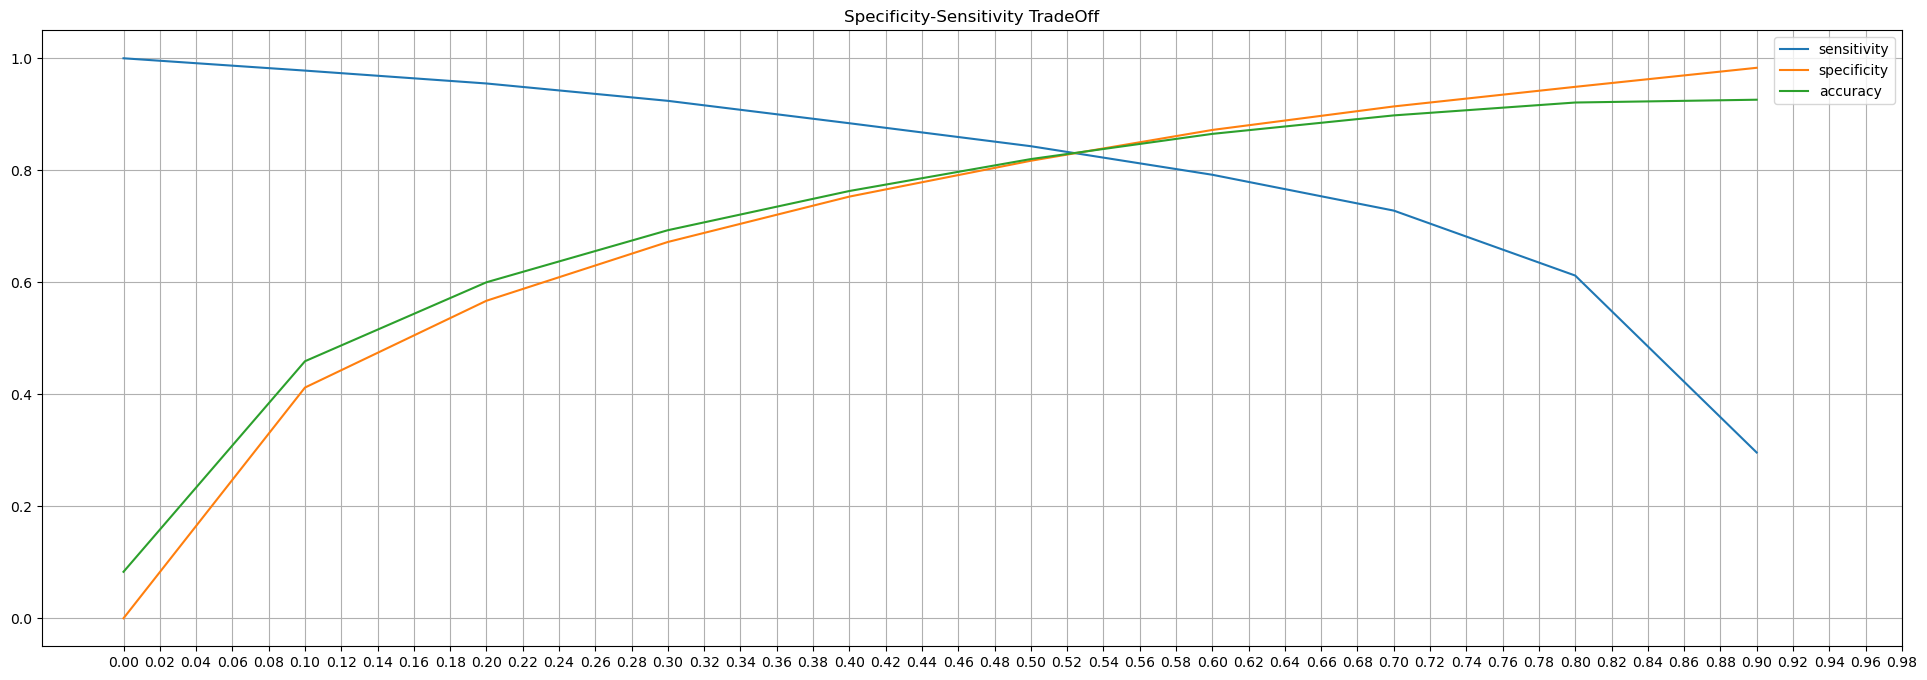

In [124]:
def plot_specificity_sensitivity_tradeoff(metrics_df):
    """
    Plot the specificity-sensitivity trade-off using the given metrics DataFrame.

    Parameters:
    - metrics_df: Pandas DataFrame containing sensitivity, specificity, and accuracy for each threshold.
    """
    metrics_df.plot(kind='line', figsize=(24, 8), grid=True, xticks=np.arange(0, 1, 0.02),
                    title='Specificity-Sensitivity TradeOff')
    plt.show()


plot_specificity_sensitivity_tradeoff(metrics_df)


In [125]:
def calculate_confusion_matrix(y_true, y_pred, cutoff):
    """
    Calculate and print the confusion matrix for the given predictions and cutoff.

    Parameters:
    - y_true: Actual labels.
    - y_pred: Predicted probabilities.
    - cutoff: Threshold for classification.

    Returns:
    - Confusion matrix.
    """
    y_pred_final = y_pred.map(lambda x: 1 if x > cutoff else 0)
    confusion_mat = confusion_matrix(y_true, y_pred_final)
    print('Confusion Matrix:\n', confusion_mat)
    return confusion_mat

In [126]:
# Set the optimum cutoff value
optimum_cutoff = 0.53

In [127]:
# Calculate and print the confusion matrix for the training set using the optimum cutoff
train_confusion_matrix = calculate_confusion_matrix(y_train, y_train_pred, optimum_cutoff)

Confusion Matrix:
 [[16101  3152]
 [  303  1444]]


In [128]:
# Calculate and print the confusion matrix for the testing set using the optimum cutoff
test_confusion_matrix = calculate_confusion_matrix(y_test, y_test_pred, optimum_cutoff)

Confusion Matrix:
 [[6976 1331]
 [ 114  580]]


In [129]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy: 0.693
Sensitivity / True Positive Rate / Recall: 0.924
Specificity / True Negative Rate: 0.672
Precision / Positive Predictive Value: 0.204
F1-score: 0.334


Test Performance : 

Accuracy: 0.697
Sensitivity / True Positive Rate / Recall: 0.909
Specificity / True Negative Rate: 0.68
Precision / Positive Predictive Value: 0.192
F1-score: 0.317


In [130]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score

In [131]:
from sklearn.metrics import roc_auc_score

def calculate_roc_auc(y_true, y_pred, dataset_name):
    """
    Calculate and print the ROC AUC score for the given predictions and dataset.

    Parameters:
    - y_true: Actual labels.
    - y_pred: Predicted probabilities.
    - dataset_name: Name of the dataset (e.g., 'Train', 'Test').

    Returns:
    - ROC AUC score.
    """
    auc_score = roc_auc_score(y_true, y_pred)
    print(f'ROC AUC score for {dataset_name} : {round(auc_score, 3)}\n')
    return auc_score



In [132]:
# Calculate and print the ROC AUC score for the training set
train_auc_score = calculate_roc_auc(y_train, y_train_pred, 'Train')

# Calculate and print the ROC AUC score for the testing set
test_auc_score = calculate_roc_auc(y_test, y_test_pred, 'Test')

ROC AUC score for Train : 0.906

ROC AUC score for Test : 0.905



In [133]:
# Create an instance of the PCA class with a specified random seed
pca = PCA(random_state=50)

# Fit the PCA model to the training data
pca.fit(X_train)

# Access the principal components (loadings) of the PCA model
pca_components = pca.components_

In [134]:
pca.explained_variance_ratio_

array([1.30712255e-01, 9.86047109e-02, 6.78441465e-02, 5.89497827e-02,
       4.14917671e-02, 3.11472176e-02, 2.71529405e-02, 2.52803719e-02,
       2.45342741e-02, 2.24240993e-02, 2.20930421e-02, 1.98214269e-02,
       1.93149084e-02, 1.64158907e-02, 1.54709835e-02, 1.50574912e-02,
       1.43717375e-02, 1.42871398e-02, 1.32959537e-02, 1.30682651e-02,
       1.14109181e-02, 1.04157979e-02, 9.93065601e-03, 9.42411630e-03,
       8.94610806e-03, 8.65519995e-03, 8.29318864e-03, 7.78824811e-03,
       7.49915832e-03, 7.37837509e-03, 7.16790770e-03, 7.09850344e-03,
       6.81718163e-03, 6.29248853e-03, 6.03391836e-03, 5.82085737e-03,
       5.77190991e-03, 5.68559028e-03, 5.65238058e-03, 5.44215031e-03,
       5.33465801e-03, 5.22473279e-03, 4.92478351e-03, 4.87213781e-03,
       4.74880345e-03, 4.46993592e-03, 4.40567205e-03, 4.21257410e-03,
       4.12321812e-03, 3.97220068e-03, 3.90244088e-03, 3.86615271e-03,
       3.83708809e-03, 3.76851891e-03, 3.53294528e-03, 3.40008775e-03,
      

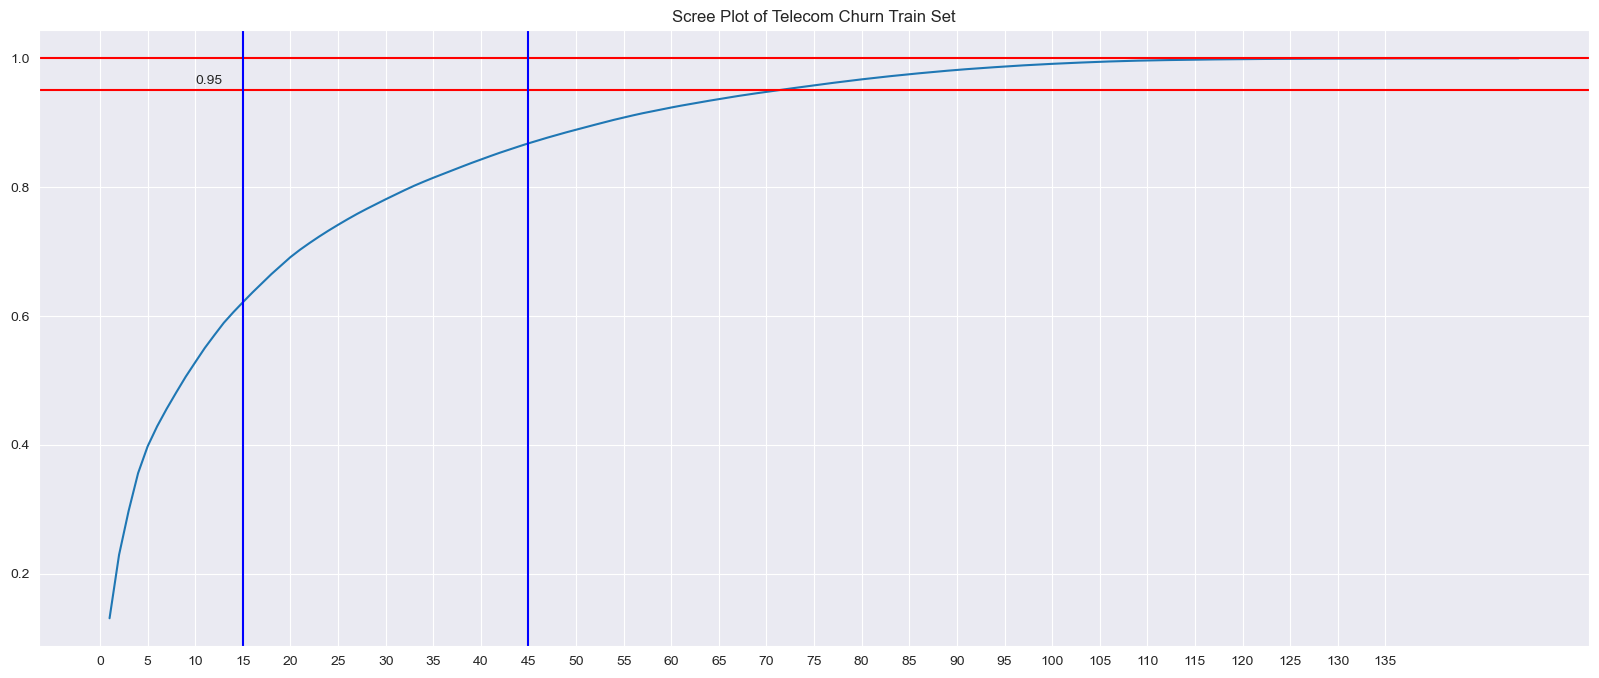

In [135]:
def plot_scree_plot(pca):
    # Calculate the cumulative explained variance ratio
    var_cum = np.cumsum(pca.explained_variance_ratio_)
    
    # Create a scree plot
    plt.figure(figsize=(20, 8))
    sns.set_style('darkgrid')
    sns.lineplot(np.arange(1, len(var_cum) + 1), var_cum)

    # Set custom ticks and lines for better visualization
    plt.xticks(np.arange(0, 140, 5))
    plt.axhline(0.95, color='r')
    plt.axhline(1.0, color='r')
    plt.axvline(15, color='b')
    plt.axvline(45, color='b')
    plt.text(10, 0.96, '0.95')

    plt.title('Scree Plot of Telecom Churn Train Set')
    plt.show()

plot_scree_plot(pca)


Based on the scree plot, the first 16 principal components explain 95% of the variance in the train set, while the first 45 components explain 100%.

In [136]:
# Create a generalized linear model (GLM) with a binomial family for logistic regression
logm1 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled)), family = sm.families.Binomial())

In [137]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38506
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                          147
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 12 Dec 2023   Deviance:                       17034.
Time:                        15:35:18   Pearson chi2:                 4.89e+09
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.4525      0.078     18.596      0.000       1.299       1.606
arpu_6                            0.0005      0.000      2.576      0.010       0.000       0.001
arpu_7                           -0.0011      0.001     -1.937      0.053      -0.002    1.29e-05
arpu_8                           -0.0011      0.001     -1.912      0.056      -0.002    2.81e-05
onnet_mou_6                       0.0003      0.000      0.763      0.446      -0.001       0.001
onnet_mou_7                       0.0013      0.000      2.767      0.006       0.000       0.002
onnet_mou_8                      -0.0015      0.000     -3.135      0.002      -0.002      -0.001
offnet_mou_6                      0.0003      0.000      0.770      0.442      -0.000       0.001
offnet_mou_7                      0.0027      0.000      5.865      0.000       0.002       0.004
offnet_mou_8                     -0.0021      0.000     -4.736      0.000      -0.003      -0.001
roam_ic_mou_6                     0.0006      0.001      0.879      0.379      -0.001       0.002
roam_ic_mou_7                     0.0025      0.001      2.559      0.011       0.001       0.004
roam_ic_mou_8                    -0.0021      0.001     -2.405      0.016      -0.004      -0.000
roam_og_mou_6                    -0.0014      0.001     -2.448      0.014      -0.002      -0.000
roam_og_mou_7                    -0.0017      0.001     -2.343      0.019      -0.003      -0.000
roam_og_mou_8                     0.0041      0.001      6.072      0.000       0.003       0.005
loc_og_t2t_mou_6                  0.0014      0.001      1.560      0.119      -0.000       0.003
loc_og_t2t_mou_7                 -0.0033      0.001     -3.372      0.001      -0.005      -0.001
loc_og_t2t_mou_8                 -0.0034      0.001     -2.720      0.007      -0.006      -0.001
loc_og_t2m_mou_6              -7.665e-05      0.001     -0.104      0.917      -0.002       0.001
loc_og_t2m_mou_7                 -0.0044      0.001     -4.851      0.000      -0.006      -0.003
loc_og_t2m_mou_8                 -0.0024      0.001     -2.101      0.036      -0.005      -0.000
loc_og_t2f_mou_6                  0.0020      0.003      0.611      0.541      -0.004       0.008
loc_og_t2f_mou_7                 -0.0126      0.004     -3.045      0.002      -0.021      -0.004
loc_og_t2f_mou_8                 -0.0029      0.004     -0.683      0.495      -0.011       0.005
loc_og_t2c_mou_6                 -0.0270      0.007     -3.772      0.000      -0.041      -0.013
loc_og_t2c_mou_7              -9.678e-05      0.007     -0.014      0.989      -0.014       0.013
loc_og_t2c_mou_8                  0.0142      0.008      1.864      0.062      -0.001       0.029
loc_og_mou_6                     -0.0013     

In [138]:
# Create an instance of the LogisticRegression class
logreg = LogisticRegression()

In [139]:
# Create an instance of Recursive Feature Elimination (RFE) using logistic regression as the estimator
rfe = RFE(estimator = logreg, n_features_to_select = 20)   

# Fit RFE to the resampled training data
rfe = rfe.fit(X_train_resampled, y_train_resampled)

In [140]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,

In [141]:
# Extract the selected columns by RFE from the resampled training data
rfe_columns=X_train_resampled.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['roam_og_mou_8', 'loc_og_t2c_mou_6', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'ic_others_7', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_6', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_3g_6', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_6', 'sep_vbc_3g'],
      dtype='object')


In [142]:
# Create a list of tuples containing column names, support status, and ranking from RFE
list(zip(X_train_resampled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 41),
 ('arpu_7', False, 99),
 ('arpu_8', False, 123),
 ('onnet_mou_6', False, 115),
 ('onnet_mou_7', False, 47),
 ('onnet_mou_8', False, 25),
 ('offnet_mou_6', False, 113),
 ('offnet_mou_7', False, 45),
 ('offnet_mou_8', False, 49),
 ('roam_ic_mou_6', False, 105),
 ('roam_ic_mou_7', False, 8),
 ('roam_ic_mou_8', False, 38),
 ('roam_og_mou_6', False, 76),
 ('roam_og_mou_7', False, 40),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 80),
 ('loc_og_t2t_mou_7', False, 43),
 ('loc_og_t2t_mou_8', False, 27),
 ('loc_og_t2m_mou_6', False, 34),
 ('loc_og_t2m_mou_7', False, 37),
 ('loc_og_t2m_mou_8', False, 13),
 ('loc_og_t2f_mou_6', False, 36),
 ('loc_og_t2f_mou_7', False, 11),
 ('loc_og_t2f_mou_8', False, 39),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', False, 102),
 ('loc_og_t2c_mou_8', False, 84),
 ('loc_og_mou_6', False, 83),
 ('loc_og_mou_7', False, 35),
 ('loc_og_mou_8', False, 26),
 ('std_og_t2t_mou_6', False, 65),
 ('std_og_t2t_mou_7', False, 53),

In [143]:
# Add a constant term to the selected features of the resampled training data
X_train_SM = sm.add_constant(X_train_resampled[rfe_columns])
# Create a generalized linear model (GLM) with a binomial family for logistic regression
logm2 = sm.GLM(y_train_resampled,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38506
Model:                            GLM   Df Residuals:                    38485
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14919.
Date:                Tue, 12 Dec 2023   Deviance:                       29838.
Time:                        15:36:48   Pearson chi2:                 8.47e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4574
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.6627      0.035     46.852      0.000       1.593       1.732
roam_og_mou_8          0.0052      0.000     22.391      0.000       0.005       0.006
loc_og_t2c_mou_6      -0.0251      0.004     -5.708      0.000      -0.034      -0.017
loc_ic_t2t_mou_8      -0.0050      0.000    -13.382      0.000      -0.006      -0.004
loc_ic_t2m_mou_8      -0.0068      0.000    -30.749      0.000      -0.007      -0.006
std_ic_mou_8          -0.0043      0.000    -14.313      0.000      -0.005      -0.004
ic_others_7           -0.0084      0.005     -1.586      0.113      -0.019       0.002
total_rech_num_6       0.0166      0.002      7.009      0.000       0.012       0.021
total_rech_num_7       0.0597      0.003     20.058      0.000       0.054       0.066
total_rech_num_8      -0.1479      0.004    -41.111      0.000      -0.155      -0.141
last_day_rch_amt_8    -0.0059      0.000    -29.462      0.000      -0.006      -0.006
total_rech_data_6      0.0175      0.008      2.069      0.039       0.001       0.034
total_rech_data_8      0.1244      0.025      5.032      0.000       0.076       0.173
max_rech_data_8       -0.0024      0.000     -9.976      0.000      -0.003      -0.002
count_rech_3g_6        0.1394      0.029      4.819      0.000       0.083       0.196
monthly_2g_6          -0.7617      0.060    -12.595      0.000      -0.880      -0.643
monthly_2g_7          -1.0763      0.071    -15.165      0.000      -1.215      -0.937
monthly_2g_8          -1.8645      0.122    -15.315      0.000      -2.103      -1.626
sachet_2g_8           -0.4857      0.029    -16.605      0.000      -0.543      -0.428
monthly_3g_6          -0.5115      0.043    -11.897      0.000      -0.596      -0.427
sep_vbc_3g            -0.0416      0.004    -11.513      0.000      -0.049      -0.035
======================================================================================
"""

In [144]:
# Drop the specified column from the selected columns obtained from RFE
rfe_columns_1=rfe_columns.drop('ic_others_7',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)



The new set of edited featured are:
 Index(['roam_og_mou_8', 'loc_og_t2c_mou_6', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_6', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_3g_6', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_6', 'sep_vbc_3g'],
      dtype='object')


In [145]:
# Add a constant term to the edited set of features from the resampled training data
X_train_SM = sm.add_constant(X_train_resampled[rfe_columns_1])

# Create a generalized linear model (GLM) with a binomial family for logistic regression
logm2 = sm.GLM(y_train_resampled, X_train_SM, family=sm.families.Binomial())

# Fit the GLM to the resampled training data
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38506
Model:                            GLM   Df Residuals:                    38486
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14920.
Date:                Tue, 12 Dec 2023   Deviance:                       29840.
Time:                        15:36:49   Pearson chi2:                 8.51e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4574
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.6598      0.035     46.844      0.000       1.590       1.729
roam_og_mou_8          0.0052      0.000     22.408      0.000       0.005       0.006
loc_og_t2c_mou_6      -0.0251      0.004     -5.705      0.000      -0.034      -0.016
loc_ic_t2t_mou_8      -0.0050      0.000    -13.411      0.000      -0.006      -0.004
loc_ic_t2m_mou_8      -0.0068      0.000    -30.951      0.000      -0.007      -0.006
std_ic_mou_8          -0.0043      0.000    -14.385      0.000      -0.005      -0.004
total_rech_num_6       0.0166      0.002      7.026      0.000       0.012       0.021
total_rech_num_7       0.0595      0.003     20.015      0.000       0.054       0.065
total_rech_num_8      -0.1478      0.004    -41.090      0.000      -0.155      -0.141
last_day_rch_amt_8    -0.0059      0.000    -29.460      0.000      -0.006      -0.006
total_rech_data_6      0.0177      0.008      2.099      0.036       0.001       0.034
total_rech_data_8      0.1246      0.025      5.038      0.000       0.076       0.173
max_rech_data_8       -0.0024      0.000     -9.976      0.000      -0.003      -0.002
count_rech_3g_6        0.1394      0.029      4.818      0.000       0.083       0.196
monthly_2g_6          -0.7624      0.060    -12.604      0.000      -0.881      -0.644
monthly_2g_7          -1.0772      0.071    -15.175      0.000      -1.216      -0.938
monthly_2g_8          -1.8649      0.122    -15.319      0.000      -2.103      -1.626
sachet_2g_8           -0.4858      0.029    -16.612      0.000      -0.543      -0.429
monthly_3g_6          -0.5110      0.043    -11.888      0.000      -0.595      -0.427
sep_vbc_3g            -0.0416      0.004    -11.507      0.000      -0.049      -0.034
======================================================================================
"""

In [146]:
rfe_columns_2=rfe_columns_1.drop('total_rech_data_6',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['roam_og_mou_8', 'loc_og_t2c_mou_6', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_rech_data_8', 'count_rech_3g_6',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_6', 'sep_vbc_3g'],
      dtype='object')


In [147]:
X_train_SM = sm.add_constant(X_train_resampled[rfe_columns_2])
logm2 = sm.GLM(y_train_resampled,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38506
Model:                            GLM   Df Residuals:                    38487
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14922.
Date:                Tue, 12 Dec 2023   Deviance:                       29845.
Time:                        15:36:49   Pearson chi2:                 8.62e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4573
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.6684      0.035     47.382      0.000       1.599       1.737
roam_og_mou_8          0.0052      0.000     22.342      0.000       0.005       0.006
loc_og_t2c_mou_6      -0.0249      0.004     -5.654      0.000      -0.034      -0.016
loc_ic_t2t_mou_8      -0.0050      0.000    -13.461      0.000      -0.006      -0.004
loc_ic_t2m_mou_8      -0.0069      0.000    -30.997      0.000      -0.007      -0.006
std_ic_mou_8          -0.0043      0.000    -14.449      0.000      -0.005      -0.004
total_rech_num_6       0.0177      0.002      7.692      0.000       0.013       0.022
total_rech_num_7       0.0593      0.003     19.951      0.000       0.053       0.065
total_rech_num_8      -0.1487      0.004    -41.627      0.000      -0.156      -0.142
last_day_rch_amt_8    -0.0060      0.000    -29.627      0.000      -0.006      -0.006
total_rech_data_8      0.1265      0.025      5.126      0.000       0.078       0.175
max_rech_data_8       -0.0024      0.000     -9.958      0.000      -0.003      -0.002
count_rech_3g_6        0.1655      0.026      6.346      0.000       0.114       0.217
monthly_2g_6          -0.7488      0.060    -12.459      0.000      -0.867      -0.631
monthly_2g_7          -1.0752      0.071    -15.157      0.000      -1.214      -0.936
monthly_2g_8          -1.8580      0.122    -15.280      0.000      -2.096      -1.620
sachet_2g_8           -0.4739      0.029    -16.559      0.000      -0.530      -0.418
monthly_3g_6          -0.5266      0.042    -12.438      0.000      -0.610      -0.444
sep_vbc_3g            -0.0416      0.004    -11.495      0.000      -0.049      -0.034
======================================================================================
"""

In [148]:
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.31458687, 0.11790422, 0.56739226, 0.03772825, 0.66787062,
       0.86632925, 0.59401261, 0.01082092, 0.49110494, 0.01151879])

In [149]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_resampled.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.314587
1,0,0.117904
2,0,0.567392
3,0,0.037728
4,0,0.667871


In [150]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.314587,0
1,0,0.117904,0
2,0,0.567392,1
3,0,0.037728,0
4,0,0.667871,1


In [151]:
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15517  3736]
 [ 2623 16630]]


In [152]:
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8348569054173376


In [153]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_resampled[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_resampled[rfe_columns].values, i) for i in range(X_train_resampled[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.set_index('Features')
vif['P-value'] = round(res.pvalues,4)
vif = vif.sort_values(by = ["VIF", 'P-value'], ascending = False)
vif

,VIF,P-value
Features,,
count_rech_3g_6,13.19,0.0
sep_vbc_3g,10.71,0.0
total_rech_num_8,6.08,0.0
last_day_rch_amt_8,4.55,0.0
total_rech_num_7,4.32,0.0
monthly_2g_7,2.94,0.0
monthly_2g_6,2.77,0.0
max_rech_data_8,2.50,0.0
monthly_3g_6,1.96,0.0


In [154]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8637614917155768
Specificity =  0.8059523191190984
False Positive Rate =  0.19404768088090169
Precision =  0.8165570067759992
True Negative Prediction Rate =  0.8554024255788313


In [156]:
def plot_roc_curve(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()



In [157]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

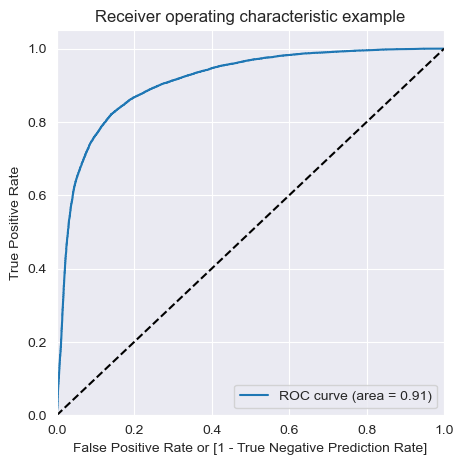

In [158]:
plot_roc_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [159]:
def create_cutoff_columns(df, probability_column, cutoff_values):
    for cutoff in cutoff_values:
        new_column_name = f'Converted_{cutoff:.1f}'
        df[new_column_name] = df[probability_column].map(lambda x: 1 if x > cutoff else 0)

create_cutoff_columns(y_train_sm_pred_final, 'Converted_prob', [float(x)/10 for x in range(10)])


In [160]:
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,Converted_0.0,Converted_0.1,Converted_0.2,Converted_0.3,Converted_0.4,Converted_0.5,Converted_0.6,Converted_0.7,Converted_0.8,Converted_0.9
0,0,0.314587,0,1,1,1,1,0,0,0,0,0,0
1,0,0.117904,0,1,1,0,0,0,0,0,0,0,0
2,0,0.567392,1,1,1,1,1,1,1,0,0,0,0
3,0,0.037728,0,1,0,0,0,0,0,0,0,0,0
4,0,0.667871,1,1,1,1,1,1,1,1,0,0,0


In [161]:
def calculate_metrics_for_cutoffs(df, probability_column, target_column, cutoff_values):
    # Create an empty DataFrame to store metrics for different cutoff values
    cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

    for cutoff in cutoff_values:
        confusion = metrics.confusion_matrix(df[target_column], df[f'Converted_{cutoff:.1f}'])
        total = sum(sum(confusion))
        accuracy = (confusion[0, 0] + confusion[1, 1]) / total
        specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
        sensitivity = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])
        cutoff_df.loc[cutoff] = [cutoff, accuracy, sensitivity, specificity]

    return cutoff_df

cutoff_metrics = calculate_metrics_for_cutoffs(y_train_sm_pred_final, 'Converted_prob', 'Converted', [float(x) / 10 for x in range(10)])


In [162]:
print(cutoff_metrics)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.714850     0.976056     0.453644
0.2          0.2  0.766218     0.952371     0.580065
0.3          0.3  0.795149     0.926141     0.664156
0.4          0.4  0.818937     0.897522     0.740352
0.5          0.5  0.834857     0.863761     0.805952
0.6          0.6  0.839324     0.815925     0.862723
0.7          0.7  0.828287     0.745650     0.910923
0.8          0.8  0.794448     0.637823     0.951073
0.9          0.9  0.620890     0.255908     0.985872


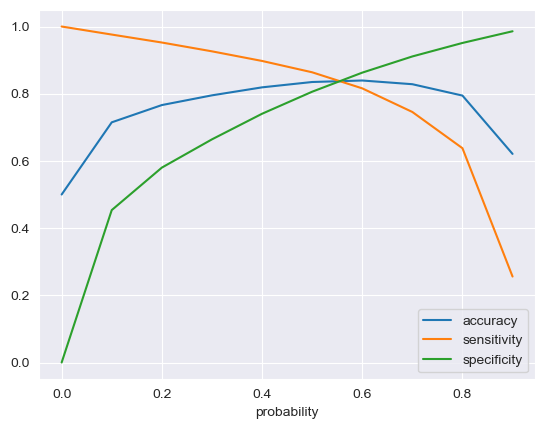

In [163]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_metrics.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [164]:
def create_refined_columns_with_cutoffs(df, probability_column, cutoff_values):
    for cutoff in cutoff_values:
        df[f'Converted_{cutoff:.2f}'] = df[probability_column].map(lambda x: 1 if x > cutoff else 0)
create_refined_columns_with_cutoffs(y_train_sm_pred_final, 'Converted_prob', [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59])

In [165]:
print(y_train_sm_pred_final.head())

   Converted  Converted_prob  churn_pred  Converted_0.0  Converted_0.1  \
0          0        0.314587           0              1              1   
1          0        0.117904           0              1              1   
2          0        0.567392           1              1              1   
3          0        0.037728           0              1              0   
4          0        0.667871           1              1              1   

   Converted_0.2  Converted_0.3  Converted_0.4  Converted_0.5  Converted_0.6  \
0              1              1              0              0              0   
1              0              0              0              0              0   
2              1              1              1              1              0   
3              0              0              0              0              0   
4              1              1              1              1              1   

   Converted_0.7  Converted_0.8  Converted_0.9  Converted_0.50  \
0       

In [166]:
def calculate_metrics_for_cutoffs(data, target_column, probability_column, cutoff_values):
    cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

    for cutoff in cutoff_values:
        confusion_matrix_values = metrics.confusion_matrix(data[target_column], data[probability_column] > cutoff)
        total = np.sum(confusion_matrix_values)
        accuracy = (confusion_matrix_values[0, 0] + confusion_matrix_values[1, 1]) / total
        specificity = confusion_matrix_values[0, 0] / (confusion_matrix_values[0, 0] + confusion_matrix_values[0, 1])
        sensitivity = confusion_matrix_values[1, 1] / (confusion_matrix_values[1, 0] + confusion_matrix_values[1, 1])

        cutoff_df = cutoff_df.append({'probability': cutoff, 'accuracy': accuracy,
                                      'sensitivity': sensitivity, 'specificity': specificity}, ignore_index=True)

    return cutoff_df
cutoff_metrics_df = calculate_metrics_for_cutoffs(y_train_sm_pred_final, 'Converted', 'Converted_prob', [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59])

In [167]:
print(cutoff_metrics_df)

   probability  accuracy  sensitivity  specificity
0         0.50  0.834857     0.863761     0.805952
1         0.51  0.835688     0.860178     0.811198
2         0.52  0.836389     0.855763     0.817016
3         0.53  0.836727     0.850777     0.822677
4         0.54  0.837168     0.845842     0.828494
5         0.55  0.837921     0.840960     0.834883
6         0.56  0.838597     0.836753     0.840440
7         0.57  0.839116     0.831974     0.846258
8         0.58  0.839480     0.826728     0.852231
9         0.59  0.839817     0.821898     0.857736


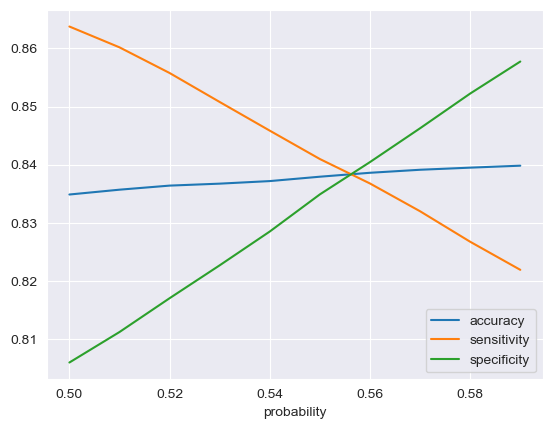

In [168]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_metrics_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [169]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.56 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,Converted_0.0,Converted_0.1,Converted_0.2,Converted_0.3,Converted_0.4,Converted_0.5,Converted_0.6,Converted_0.7,Converted_0.8,Converted_0.9,Converted_0.50,Converted_0.51,Converted_0.52,Converted_0.53,Converted_0.54,Converted_0.55,Converted_0.56,Converted_0.57,Converted_0.58,Converted_0.59,final_churn_pred
0,0,0.314587,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.117904,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.567392,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1
3,0,0.037728,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.667871,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1


In [170]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8385965823508025


In [171]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16181  3072]
 [ 3143 16110]]


In [172]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8367527138627746
Specificity =  0.8404404508388303
False Positive Rate =  0.15955954916116968
Precision =  0.8398498592430403
True Negative Prediction Rate =  0.8373525150072448


In [174]:
from sklearn.metrics import precision_recall_curve

In [175]:
def plot_precision_recall_curve(y_true, y_probs):
    p, r, thresholds = precision_recall_curve(y_true, y_probs)

    # Plotting the curve
    plt.plot(thresholds, p[:-1], "b-", label="Precision")
    plt.plot(thresholds, r[:-1], "g-", label="Recall")
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.title('Precision-Recall Curve')
    plt.show()


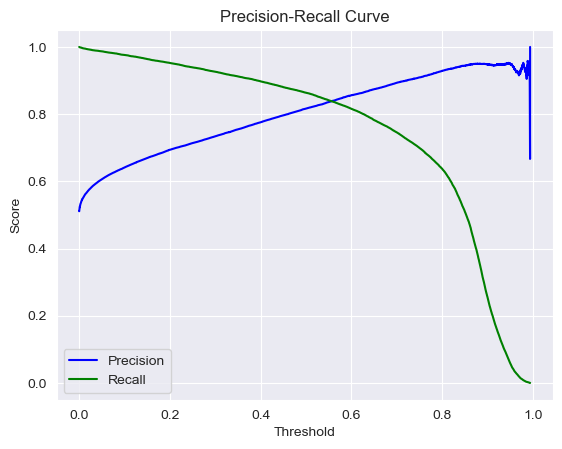

In [176]:
plot_precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [177]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,roam_og_mou_8,loc_og_t2c_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,std_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_3g_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,sep_vbc_3g
55440,-0.266806,-0.340720,-0.207915,0.183135,-0.227447,-0.671934,-0.074254,-0.925173,1.530422,-0.218077,1.826455,0.706738,-0.398984,-0.409273,-0.382269,-0.441309,1.467901,-0.216926
18146,-0.266806,-0.340720,5.925522,-0.481348,-0.474403,-0.437306,-0.880231,-0.337360,-0.583780,1.335391,-0.452102,-0.452482,-0.398984,-0.409273,-0.382269,1.709619,-0.380287,-0.216926
18796,-0.266806,-0.340720,0.045576,-0.628488,-0.069747,-0.671934,-0.419673,-0.807611,0.402848,-0.606444,-0.703044,-0.452482,-0.398984,-0.409273,-0.382269,-0.441309,-0.380287,-0.216926
26849,-0.266806,-0.340720,-0.161085,0.020317,-0.330536,-1.258502,-0.074254,0.132891,0.534398,-0.606444,-0.703044,-0.452482,-0.398984,-0.409273,-0.382269,-0.441309,-0.380287,-0.216926
96898,-0.266806,3.533729,-0.199448,-0.394452,0.349464,-0.437306,-0.419673,-0.690048,-0.818692,-0.606444,-0.703044,-0.452482,-0.398984,-0.409273,-0.382269,-0.441309,-0.380287,-0.216926


In [178]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [179]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 55440    0.940905
18146    0.930090
18796    0.970068
26849    0.965959
96898    0.966875
53673    0.960491
59168    0.309405
31958    0.933971
67542    0.968392
29832    0.966248
dtype: float64


In [180]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
55440,0.940905
18146,0.930090
18796,0.970068
26849,0.965959
96898,0.966875


In [181]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [182]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
55440,0
18146,0
18796,0
26849,0
96898,0


In [183]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()


,churn,Conv_prob
55440,0,0.940905
18146,0,0.930090
18796,0,0.970068
26849,0,0.965959
96898,0,0.966875


In [184]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
55440,0,0.940905,1
18146,0,0.930090,1
18796,0,0.970068,1
26849,0,0.965959,1
96898,0,0.966875,1


In [185]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.25208310187756916

In [186]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[1609 6698]
 [  34  660]]


In [187]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [188]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.9510086455331412
Specificity =  0.19369206693150356
False Positive Rate =  0.8063079330684965
Precision =  0.08969828757814624
True Negative Prediction Rate =  0.9793061472915399


Model 3 : Decision Tree

In [189]:
from sklearn.tree import DecisionTreeClassifier

In [190]:
def perform_decision_tree_grid_search(X_train, y_train):
    # Create the parameter grid
    param_grid = {
        'max_depth': range(5, 15, 5),
        'min_samples_leaf': range(50, 150, 50),
        'min_samples_split': range(50, 150, 50),
    }

    # Instantiate the Decision Tree classifier
    dtree = DecisionTreeClassifier()

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator=dtree, 
                               param_grid=param_grid, 
                               scoring='recall',
                               cv=5, 
                               verbose=1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    return grid_search

In [191]:
grid_search_result = perform_decision_tree_grid_search(X_train_pca, y_train)
grid_search_result

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [192]:
# cv results
cv_results = pd.DataFrame(grid_search_result.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.567186,0.030337,0.003801,0.001165,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.154728,0.120344,0.169054,0.165714,0.077143,0.137397,0.034715,7
1,0.480075,0.039978,0.003103,0.001024,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.154728,0.120344,0.169054,0.165714,0.077143,0.137397,0.034715,7
2,0.442985,0.006602,0.002599,0.000490,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.169054,0.077364,0.169054,0.140000,0.137143,0.138523,0.033493,5
3,0.437306,0.018649,0.003396,0.000802,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.169054,0.077364,0.169054,0.140000,0.137143,0.138523,0.033493,5
4,0.697181,0.011341,0.002803,0.000401,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.257880,0.275072,0.223496,0.191429,0.225714,0.234718,0.029141,1
5,0.709101,0.020847,0.002801,0.000400,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.257880,0.275072,0.223496,0.191429,0.225714,0.234718,0.029141,1
6,0.695193,0.037143,0.002902,0.000192,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.232092,0.220630,0.214900,0.214286,0.248571,0.226096,0.012929,3
7,0.676109,0.030317,0.003002,0.000632,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.232092,0.220630,0.214900,0.214286,0.248571,0.226096,0.012929,3


In [193]:
# Printing the optimal sensitivity score and hyperparameters
print("Optimal sensitivity:-", grid_search_result.best_score_)
print(grid_search_result.best_estimator_)

Optimal sensitivity:- 0.2347179697093737
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [194]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [195]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [196]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18952   301]
 [ 1183   564]]


In [197]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [198]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.9293333333333333
Sensitivity: 0.32283915283342873
Specificity: 0.9843660728198202


In [199]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [200]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[8132  175]
 [ 514  180]]


In [201]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [202]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9234529496722587
Sensitivity:- 0.25936599423631124
Specificity:- 0.978933429637655


Model 4 : Random Forest

In [203]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [204]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [205]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.919047619047619 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [206]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [207]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [208]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [209]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[19232    21]
 [ 1653    94]]


In [210]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [211]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.9202857142857143
Sensitivity: 0.053806525472238124
Specificity: 0.998909260894406


In [212]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [213]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[8297   10]
 [ 668   26]]


In [214]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [215]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.9246750361070992
Sensitivity: 0.037463976945244955
Specificity: 0.9987961959792946


Conclusions:
- After analyzing the data, it was found that customers who churn have a lower average of monthly incoming and outgoing calls.
- If a customer recharges a low amount or count, it increases their likelihood of churning.
- The customers who use internet packages such as 2G and 3G, and social media-based packages like Facebook on a high rate tend to stay rather than churn.
- It has been observed that the month of August (Month 8) experiences the highest number of customer churn compared to other months.

Recommendations:
- Customers who use internet packages at a low rate are more likely to churn. To retain these customers, offering a period of free data may encourage them to stay rather than leave.
- Giving additional benefits to customers who spend less on recharge can encourage them to stay.
- Extending the talktime validity for inactive customers.
